# Solar Power

## Business Understanding

### Stakeholder:
- 
-
- https://www.eia.gov/energyexplained/electricity/electricity-in-the-us.php

### True Business Problem:
With a recent push for cleaner renewable energy (company name) is seeing an increase in solar panel request. (company name) is looking the potential of solar power and how it can meet the demands of the current power consumption. 

### Modeling Overview
- what steps am i taking and why?
- what am i looking to accomplish with the results?
- what is the specific use for model? why or why not can/can't it be used?
- create markdown cells explaining why i chose something or did not choose something (create a story).

# Data Understanding

In [1]:
# imports
import pandas as pd
import numpy as np
import requests 

from datetime import datetime as dt
from secret import keys
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Data was pulled from `https://www.eia.gov/opendata/index.php`
- In previous notebooks it was shown that I pulled in the data and created a master dataframe. From there I pulled the data down to my `data` folder within my `projects` and will use that as the source of my data.
- I originally used `parameters` to pull in the data from the website, which were:
    - `'api_key': api_key`,
    - `"frequency": "hourly"`, is pulling data in hourly.
    - `"data[]": "value"`, is the amount of energy produced
    - `"facets[fueltype][]":["SUN", "NG", "OIL"]`, energy source 
    - `"facets[respondent][]": "SOCO"`, recording location of data (Southern Company)
    - `"start": "2021-07-01"`, Time frame to pull data (start and end date)
    - `"end": "2022-07-29"`,
    - `"offset"`: 0
- Next, I assigned the data to list, requested the response from the website while using the above `parameters`, and assigned it to a dataframe.
    - dfs = []
    - for off in range(0, 30000, 5000):
        - params["offset"] = off
        - resp = requests.get(base_url, params=params)
        - data = resp.json()
        - df = pd.DataFrame(data['response']['data'])
        - dfs.append(df)
- Finally, I assigned the index, picked the columns that would be kept, and the target column `value`
    - df2 = pd.pivot(data=pd.concat(dfs), index='period', columns='fueltype', values='value')
- Side note: all seven notebooks were pulled down from the same website using the same parameters and process. There were a few tweaks made to certain codes to allow for specific data to be pulled in. 
    - I am using seven different dataframes because pulling the data in as one from the website created `NAN` in places were data was present. Separating the data allowed for all the necessary data to be acquired with not `NAN`.

In [2]:
!ls ../data

df2.csv
df_col.csv
df_dem.csv
df_hydro.csv
df_ng.csv
df_nuc.csv
df_oil.csv
df_oth.csv
df_sun.csv
df_wind.csv


In [3]:
df_dem = pd.read_csv('../data/df_dem.csv')
df_dem.tail()

Unnamed: 0         period  value
18187        3187  2022-07-28T19  41972
18188        3188  2022-07-28T20  42602
18189        3189  2022-07-28T21  42827
18190        3190  2022-07-28T22  42538
18191        3191  2022-07-28T23  41878

In [4]:
df_oil = pd.read_csv('../data/df_oil.csv')
df_oil.tail()

Unnamed: 0         period  value
18187        3187  2022-07-28T19      0
18188        3188  2022-07-28T20     -1
18189        3189  2022-07-28T21      0
18190        3190  2022-07-28T22      0
18191        3191  2022-07-28T23      0

In [5]:
df_col = pd.read_csv('../data/df_col.csv')
df_col.head(2)

Unnamed: 0         period  value
0           0  2020-07-01T00   6554
1           1  2020-07-01T01   6128

In [6]:
df_sun = pd.read_csv('../data/df_sun.csv')
df_sun.head(2)

Unnamed: 0         period  value
0           0  2020-07-01T00    137
1           1  2020-07-01T01     24

In [7]:
df_gas = pd.read_csv('../data/df_ng.csv')
df_gas.tail(2)

Unnamed: 0         period  value
18190        3190  2022-07-28T22  24684
18191        3191  2022-07-28T23  24755

In [8]:
df_hydro = pd.read_csv('../data/df_hydro.csv')
df_hydro.head(2)

Unnamed: 0         period  value
0           0  2020-07-01T00   1992
1           1  2020-07-01T01   1268

In [9]:
df_nuc = pd.read_csv('../data/df_nuc.csv')
df_nuc.head(2)

Unnamed: 0         period  value
0           0  2020-07-01T00   5819
1           1  2020-07-01T01   5828

In [10]:
df_wind = pd.read_csv('../data/df_wind.csv')
df_wind.head(2)

Unnamed: 0         period  value
0           0  2020-07-01T00      0
1           1  2020-07-01T01      0

In [11]:
df_oth = pd.read_csv('../data/df_oth.csv')
df_oth.head(2)

Unnamed: 0         period  value
0           0  2020-07-01T00    311
1           1  2020-07-01T01    316

## Datetime, Index, and Resample
- Below, a `datetime` will be created and will be assigned as the `index`
- `Datetime` will make it easier to read time read timeseries plots.
- The data will resample from hourly to daily to inspect how the data behaves under a different frequency.

#### Hydro

In [17]:
# when imported the original row number was imported because of that I am pulling 
                                   # the columns that I need and dropping the rest.
df_hydro = df_hydro[['period', 'value']]

# Making the period (contains the date and time by hour) into a datetime column for forecasting purposes
df_hydro['period'] = pd.to_datetime(df_hydro['period'])

# Setting the new datetime column('period') as the index.
df_hydro = df_hydro.set_index('period')

# Sampling the hourly data into daily data. 
df_hydro = df_hydro.resample('D').sum()

df_hydro.head(2)

# This process will be repeated for the remaining dataframes.

value
period           
2020-07-01  27192
2020-07-02  29241

#### Solar

In [18]:
df_sun = df_sun[['period', 'value']]

df_sun['period'] = pd.to_datetime(df_sun['period'])

df_sun = df_sun.set_index('period')

df_sun = df_sun.resample('D').sum()

df_sun.head(2)

value
period           
2020-07-01  12912
2020-07-02  17038

#### Coal

In [19]:
df_col = df_col[['period', 'value']]

df_col['period'] = pd.to_datetime(df_col['period'])

df_col = df_col.set_index('period')

df_col = df_col.resample('D').sum()

df_col.head(2)

value
period            
2020-07-01  129009
2020-07-02  112601

#### Natural Gas

In [20]:
df_gas = df_gas[['period', 'value']]

df_gas['period'] = pd.to_datetime(df_gas['period'])

df_gas = df_gas.set_index('period')

df_gas = df_gas.resample('D').sum()

df_gas.tail(2)

value
period            
2022-07-27  475039
2022-07-28  482369

#### Oil

In [21]:
df_oil = df_oil[['period', 'value']]

df_oil['period'] = pd.to_datetime(df_oil['period'])

df_oil = df_oil.set_index('period')

df_oil = df_oil.resample('D').sum()

df_oil.head(2)

value
period           
2020-07-01    -15
2020-07-02     -2

#### Nuclear

In [22]:
df_nuc = df_nuc[['period', 'value']]

df_nuc['period'] = pd.to_datetime(df_nuc['period'])

df_nuc = df_nuc.set_index('period')

df_nuc = df_nuc.resample('D').sum()

df_nuc.head(2)

value
period            
2020-07-01  140217
2020-07-02  140339

#### Wind

In [23]:
df_wind = df_wind[['period', 'value']]

df_wind['period'] = pd.to_datetime(df_wind['period'])

df_wind = df_wind.set_index('period')

df_wind = df_wind.resample('D').sum()

df_wind.head(2)

value
period           
2020-07-01      0
2020-07-02      0

#### Other

In [24]:
df_oth = df_oth[['period', 'value']]

df_oth['period'] = pd.to_datetime(df_oth['period'])

df_oth = df_oth.set_index('period')

df_oth = df_oth.resample('D').sum()

df_oth.head(2)

value
period           
2020-07-01   7461
2020-07-02   7153

#### Demand

In [25]:
df_dem = df_dem[['period', 'value']]

df_dem['period'] = pd.to_datetime(df_dem['period'])

df_dem = df_dem.set_index('period')

df_dem = df_dem.resample('D').sum()

df_dem.head(2)

value
period            
2020-07-01  701703
2020-07-02  709342

# Arima: AutoRegressive Integrated Moving Average
- Above we set the datetime and index.
- Below we will be fitting ARMA models on the nine datasets we pulled in above.
    - We will look at `seasonal_decompose`:
        - Trend, Seasonal, and Residual
    - Train, test split on the dataframes
    - Plot the results
- The purpose is to look for a stationary time series, manipulate and visualize time series data. 
- These are the steps that will be taken for all the Arima models.

In [26]:
# Decompose Import
from statsmodels.tsa.seasonal import seasonal_decompose

#### Gas

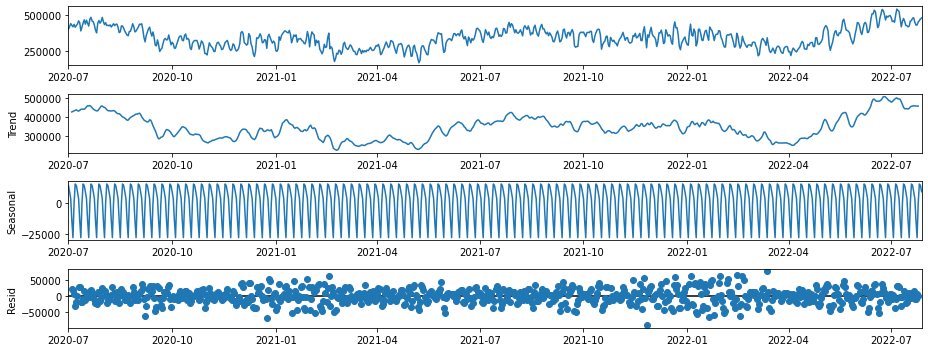

In [27]:
decomp = seasonal_decompose(df_gas)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [28]:
train_gas, test_gas = train_test_split(df_gas, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

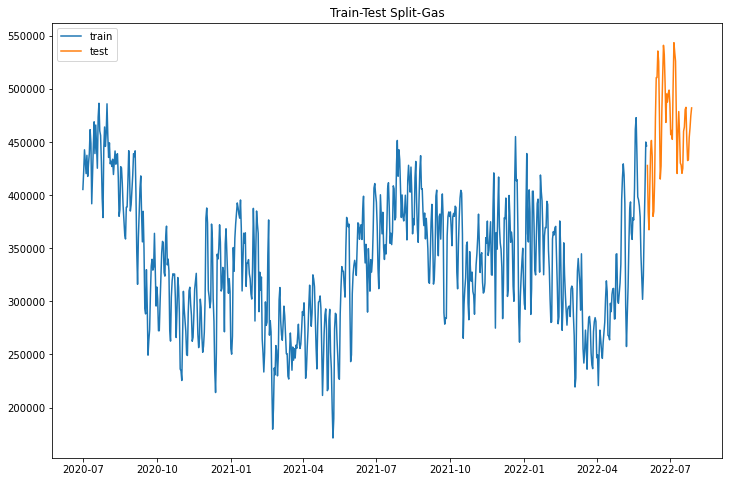

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_gas, label='train')
ax.plot(test_gas, label='test')
ax.set_title('Train-Test Split-Gas');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing to make it stationary. 
- There is a seasonality of a week along with a steady trend that drops in Apr 2022 and increases drastically during June and July of 2022.

#### Oil

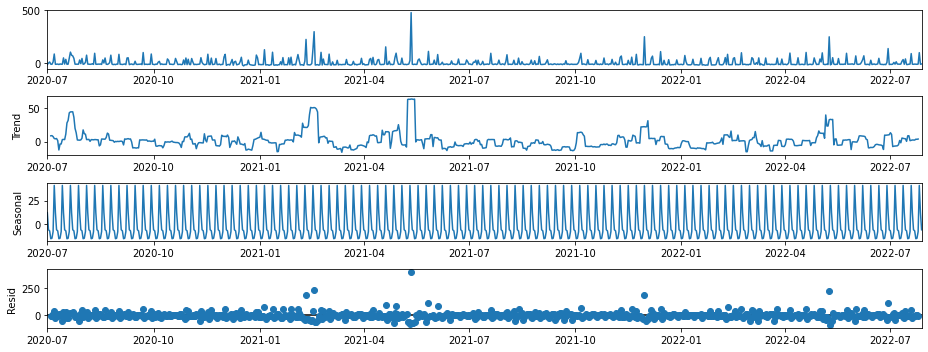

In [30]:
decomp = seasonal_decompose(df_oil)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [31]:
train_oil, test_oil = train_test_split(df_oil, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

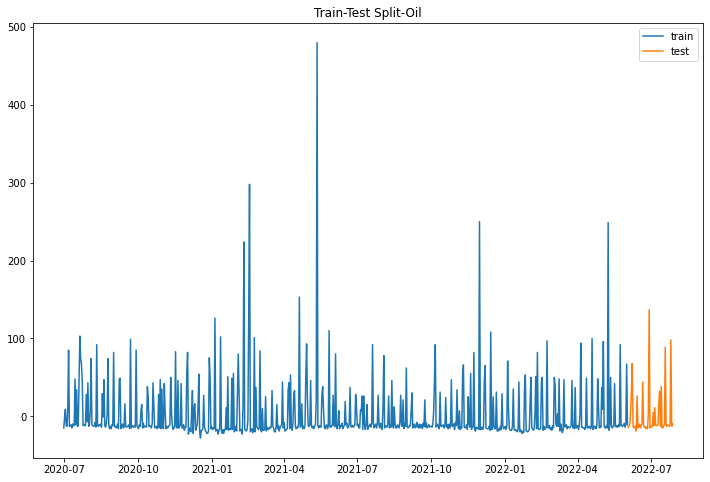

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_oil, label='train')
ax.plot(test_oil, label='test')
ax.set_title('Train-Test Split-Oil');
plt.legend();

### Conclusion:
- The model suggest that the time series is somewhat stationary and but may still require differencing. 
- There is a seasonality of a week along with a steady trend that is steady fluctuating and an observed that follows the same trend.

#### Sun

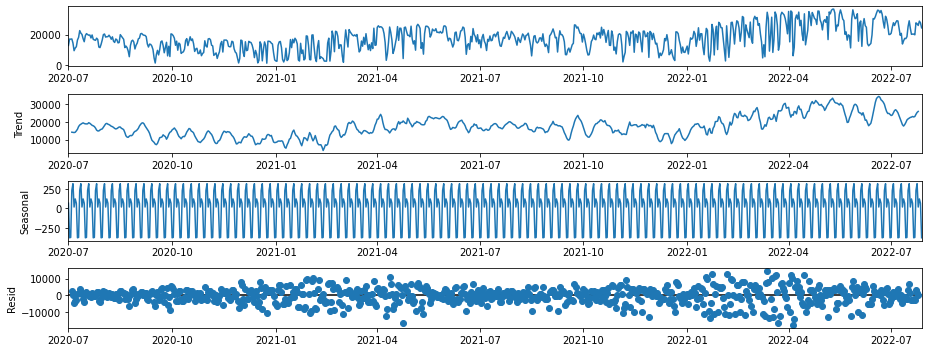

In [33]:
decomp = seasonal_decompose(df_sun)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [34]:
train_sun, test_sun = train_test_split(df_sun, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

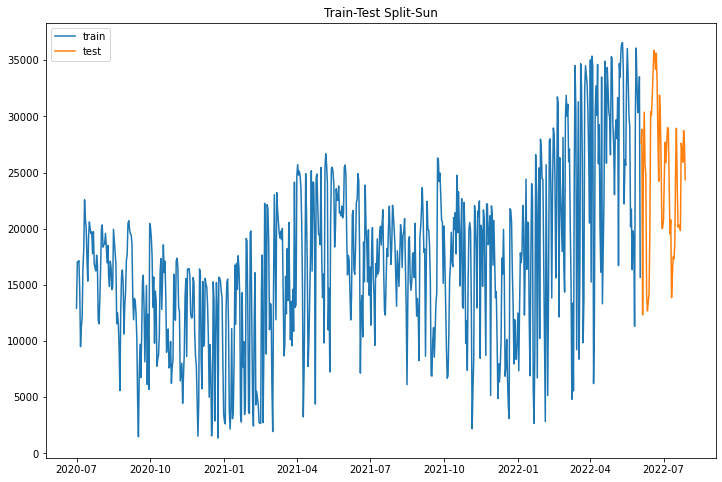

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_sun, label='train')
ax.plot(test_sun, label='test')
ax.set_title('Train-Test Split-Sun');
plt.legend();

### Conclusion:
- The model suggest that the time series is somewhat stationary and but may still require differencing. 
- There is a seasonality of a week.
- The trend is steady fluctuating with a big spike toward the later months and an observed that follows the same trend.

#### Hydro

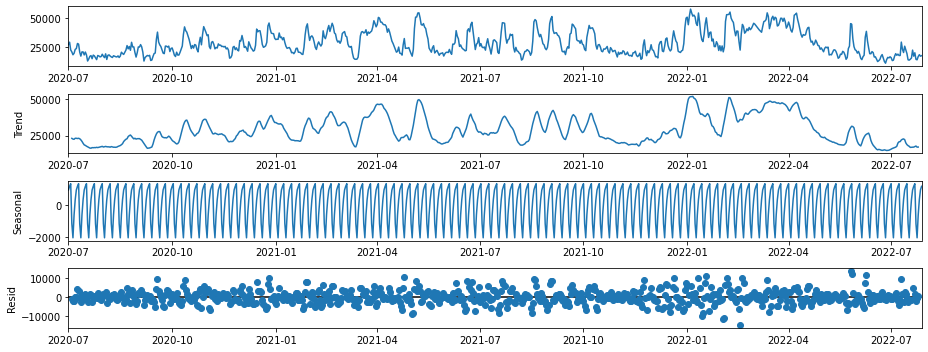

In [36]:
decomp = seasonal_decompose(df_hydro)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [37]:
train_hydro, test_hydro = train_test_split(df_hydro, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

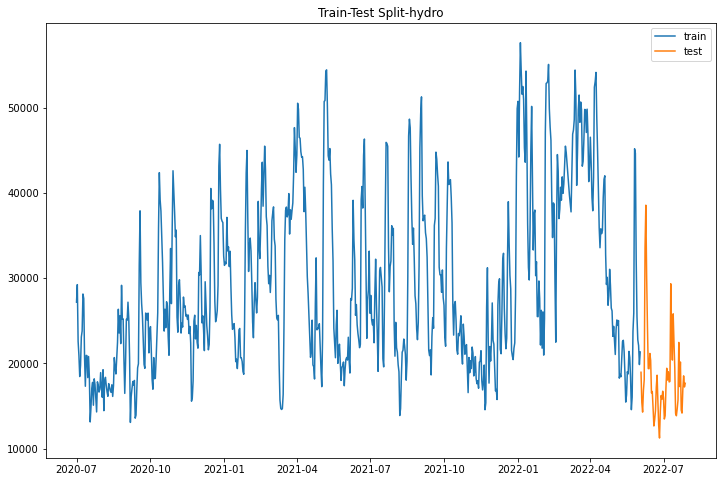

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_hydro, label='train')
ax.plot(test_hydro, label='test')
ax.set_title('Train-Test Split-hydro');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend is fluctuating with a big spike toward the beginning and middle months and an observed that follows the same trend.

#### Nuclear

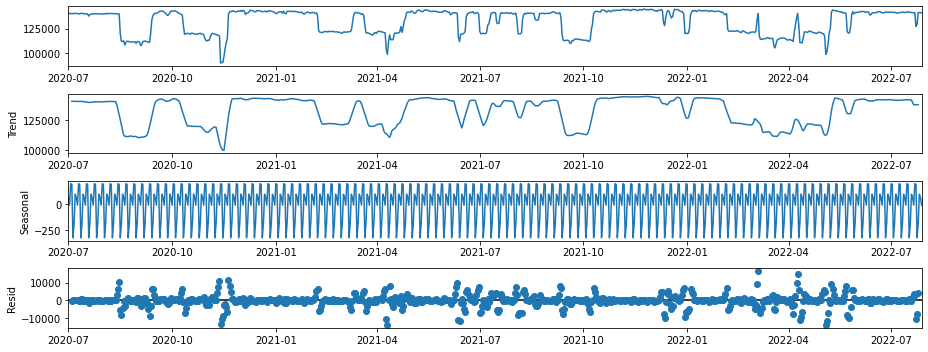

In [39]:
decomp = seasonal_decompose(df_nuc)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [40]:
train_nuc, test_nuc = train_test_split(df_nuc, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

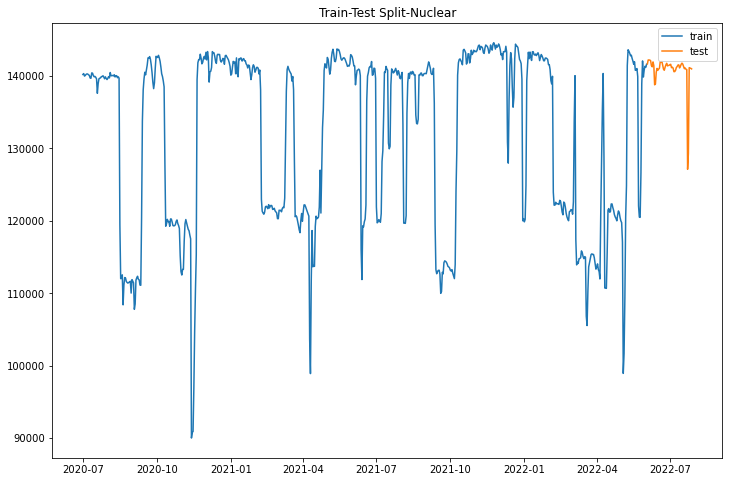

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_nuc, label='train')
ax.plot(test_nuc, label='test')
ax.set_title('Train-Test Split-Nuclear');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend is fluctuating with a big spike toward the beginning, middle, and demand months with drastic drops in between. The observed follows a similar trend and the trend category.

#### Wind

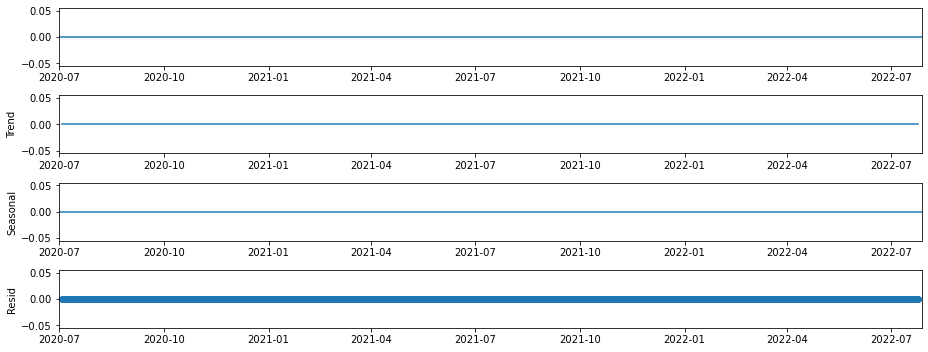

In [42]:
decomp = seasonal_decompose(df_wind)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [43]:
train_wind, test_wind = train_test_split(df_wind, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

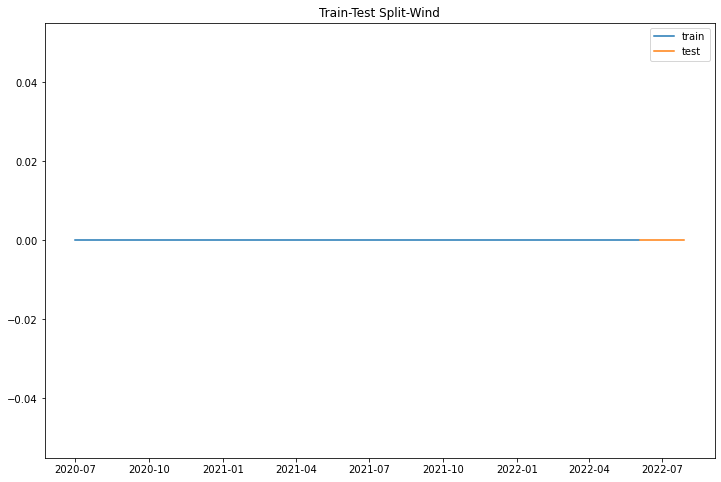

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_wind, label='train')
ax.plot(test_wind, label='test')
ax.set_title('Train-Test Split-Wind');
plt.legend();

### Conclusion:
- The model can't be used because of insufficient data (all the numbers are zero). There is no point in predicting wind. 

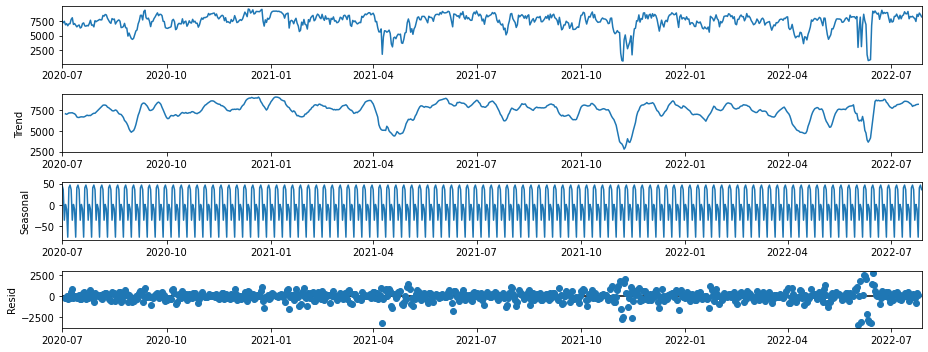

In [45]:
decomp = seasonal_decompose(df_oth)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

#### Other

In [46]:
train_oth, test_oth = train_test_split(df_oth, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

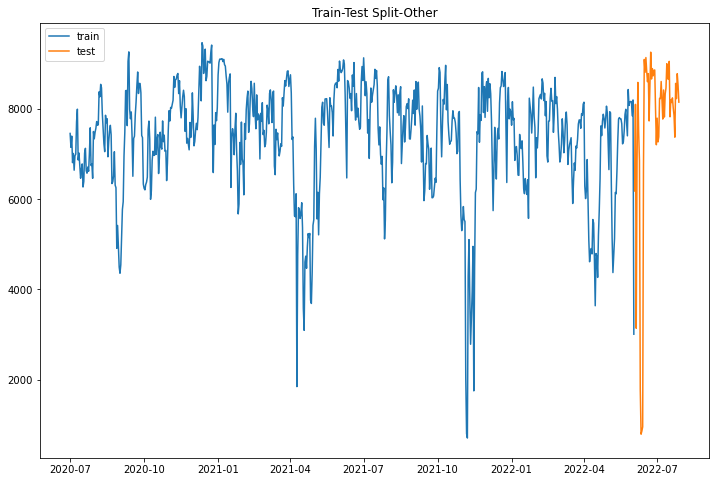

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_oth, label='train')
ax.plot(test_oth, label='test')
ax.set_title('Train-Test Split-Other');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend shows a drop during three timeframes througout the year. 
- The observed follows a similar trend as the trend category.

#### Demand

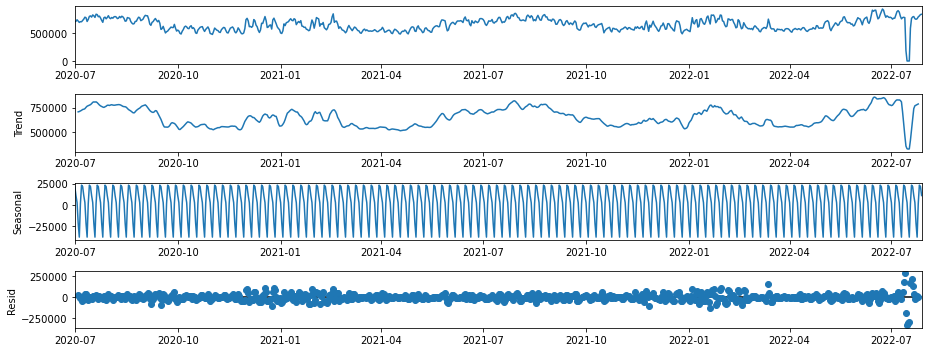

In [48]:
decomp = seasonal_decompose(df_dem)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [49]:
train_dem, test_dem = train_test_split(df_dem, test_size = 56, shuffle=False)
# We're modeling, so we'll want to reserve some data as a test set.
# Because we are creating a time series model, the data will split be split on the end of the data versus randomly. 
# The train will happen on the earlier data and the test will happen on the last portion of the data (56 days).

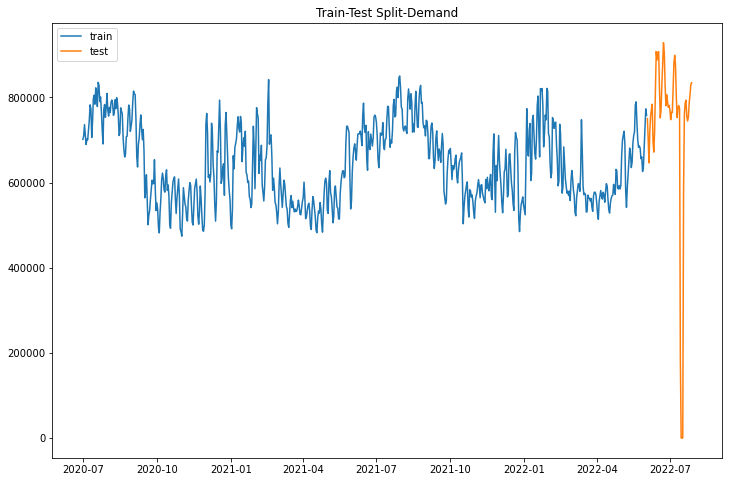

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_dem, label='train')
ax.plot(test_dem, label='test')
ax.set_title('Train-Test Split-Demand');
plt.legend();

### Conclusion:
- The model suggest that the time series is stationary given one drastic drop in demand.. 
- There is a seasonality of a week.
- The trend shows a drop during the demand drop timeframe at the later part of the year. 
- The observed follows a similar trend as the trend category.

# PMDArima and FBProphet
- I will be dropping wind from all future modeling because the values are all `0`
- I will then give the Arima models from above some differences to try pull better results.
- With FBProphet we will be using a addictive model that will be analyzing and predictiong periodic data.
    - We will need to rename the columns to `ds` and `y`.
    - We will reset the index in order to label the index `period` back to a column. 

In [51]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose, auto_arima
from pmdarima.arima.stationarity import ADFTest

In [52]:
from prophet import Prophet

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## PMDArima Gas

In [53]:
# Checking stationarity
adf_test_gas = ADFTest()

adf_test_gas = ADFTest(alpha=0.05)
p_val_gas, should_diff_gas = adf_test_gas.should_diff(df_gas) 

print(f"P-Value: {p_val_gas}, so should you difference the data? {should_diff_gas}")

P-Value: 0.2262547435987499, so should you difference the data? True


In [54]:
arima_gas = auto_arima(train_gas,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=16344.036, Time=2.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16478.583, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=16453.061, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=16440.376, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16476.586, Time=0.05 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=16346.556, Time=0.98 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=16347.469, Time=0.77 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=16345.524, Time=4.91 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=16345.483, Time=5.88 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=16351.451, Time=0.29 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=16344.530, Time=2.43 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=16345.611, Time=2.21 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=7.57 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=16385.111, Time=0.99 sec
 ARIMA(1,1,

In [55]:
arima_gas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  702
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -8158.713
Date:                              Wed, 10 Aug 2022   AIC                          16333.425
Time:                                      10:21:08   BIC                          16369.846
Sample:                                           0   HQIC                         16347.503
                                              - 702                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4743      0.054     27.546      0.000       1.369       1.579
ar.L2         -0.5668      0.039    -14.707      0.000      -0.642      -0.491
ma.L1         -1.4618      0.051    -28.459      0.000      -1.562      -1.361
ma.L2          0.1885      0.050      3.804      0.000       0.091       0.286
ma.L3          0.3191      0.032     10.089      0.000       0.257       0.381
ar.S.L12       0.4826      0.156      3.103      0.002       0.178       0.788
ma.S.L12      -0.6224      0.149     -4.187      0.000      -0.914      -0.331
sigma2      7.602e+08    1.3e-10   5.86e+18      0.000     7.6e+08     7.6e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                31.55
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.25
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+34. Standard errors may be unstable.
"""

In [56]:
test_preds_gas = pd.Series(arima_gas.predict(n_periods=len(test_gas)), index=test_gas.index)

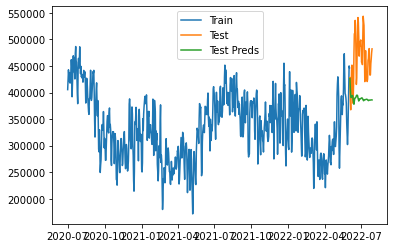

In [57]:
plt.plot(train_gas, label = 'Train')
plt.plot(test_gas, label = 'Test')
plt.plot(test_preds_gas, label = 'Test Preds')
plt.legend();

In [58]:
# Fit the best fit model from grid search SARIMAX(2, 1, 3)x(1, 0, 1, 12)
seas_arima_gas = ARIMA(train_gas,
                   order=(2, 1, 3),
                   seasonal_order=(1, 0, 1, 12))
res_sarima_gas = seas_arima_gas.fit()

# Print out summary information on the fit
print(res_sarima_gas.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  702
Model:             ARIMA(2, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -8158.713
Date:                            Wed, 10 Aug 2022   AIC                          16333.425
Time:                                    10:21:16   BIC                          16369.846
Sample:                                07-01-2020   HQIC                         16347.503
                                     - 06-02-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4743      0.054     27.546      0.000       1.369       1.579
ar.L2         -0.5668      0.039   

## FBProphet Gas

In [59]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_gas = Prophet(interval_width = 0.95)

In [60]:
train_gas_pr = train_gas.reset_index()
train_gas_pr
# resetting the index for the train_gas dataframe

period   value
0   2020-07-01  405505
1   2020-07-02  422388
2   2020-07-03  442867
3   2020-07-04  432224
4   2020-07-05  420461
..         ...     ...
697 2022-05-29  324109
698 2022-05-30  368909
699 2022-05-31  404136
700 2022-06-01  450210
701 2022-06-02  446632

[702 rows x 2 columns]

In [61]:
train_gas_pr = train_gas_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will force the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

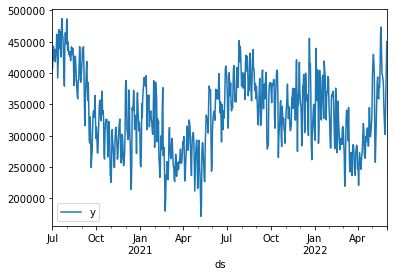

In [62]:
train_gas_pr.plot(y = 'y', x = 'ds')

In [63]:
# Fit the timeseries to Model_'energy source'
Model_gas.fit(train_gas_pr)

10:21:17 - cmdstanpy - INFO - Chain [1] start processing
10:21:17 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
train_gas_pr

ds       y
0   2020-07-01  405505
1   2020-07-02  422388
2   2020-07-03  442867
3   2020-07-04  432224
4   2020-07-05  420461
..         ...     ...
697 2022-05-29  324109
698 2022-05-30  368909
699 2022-05-31  404136
700 2022-06-01  450210
701 2022-06-02  446632

[702 rows x 2 columns]

In [65]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 days
future_gas = Model_gas.make_future_dataframe(periods = 56, freq = 'D')

In [66]:
#Predict the future dates and values
results_gas = Model_gas.predict(df = future_gas)

results_gas.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
753 2022-07-24  307671.469717  199146.263741  360598.958472  296659.832120   
754 2022-07-25  307503.747722  223020.832759  387643.864865  296000.264894   
755 2022-07-26  307336.025728  233524.597624  405626.049559  295526.184434   
756 2022-07-27  307168.303733  233808.679645  404675.131223  295249.129803   
757 2022-07-28  307000.581738  225108.737784  398322.931210  294785.478612   

       trend_upper  additive_terms  additive_terms_lower  \
753  320284.515040   -26848.849727         -26848.849727   
754  320547.151029     1031.831428           1031.831428   
755  321001.469046    15426.872152          15426.872152   
756  321452.773295    12958.931535          12958.931535   
757  321764.804466     8063.897475           8063.897475   

     additive_terms_upper        weekly  weekly_lower  weekly_upper  \
753         -26848.849727 -26848.849727 -26848.849727 -26848.849727   
754           1031.831428   1031.831428   1031.831428   1031.831428   
755          15426.872152  15426.872152  15426.872152  15426.872152   
756          12958.931535  12958.931535  12958.931535  12958.931535   
757           8063.897475   8063.897475   8063.897475   8063.897475   

     multiplicative_terms  multiplicative_terms_lower  \
753                   0.0                         0.0   
754                   0.0                         0.0   
755                   0.0                         0.0   
756                   0.0                         0.0   
757                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
753                         0.0  280822.619990  
754                         0.0  308535.579150  
755                         0.0  322762.897880  
756                         0.0  320127.235268  
757                         0.0  315064.479214

- Columns that are most relevant to forecasting
    - ds : the datestamp of the forecasted value
    - yhat : the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
    - yhat_lower : the lower bound of our forecasts
    - yhat_upper : the upper bound of our forecasts
***This will be the same throughout the notebook**

In [67]:
results_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds           yhat     yhat_lower     yhat_upper
0   2020-07-01  448467.757035  364649.919810  534497.244956
1   2020-07-02  442637.484724  356249.232074  529356.799059
2   2020-07-03  436545.573155  352786.188582  520764.600593
3   2020-07-04  419163.203723  334263.949559  501603.695739
4   2020-07-05  404919.022767  320684.296568  493326.264835
..         ...            ...            ...            ...
753 2022-07-24  280822.619990  199146.263741  360598.958472
754 2022-07-25  308535.579150  223020.832759  387643.864865
755 2022-07-26  322762.897880  233524.597624  405626.049559
756 2022-07-27  320127.235268  233808.679645  404675.131223
757 2022-07-28  315064.479214  225108.737784  398322.931210

[758 rows x 4 columns]

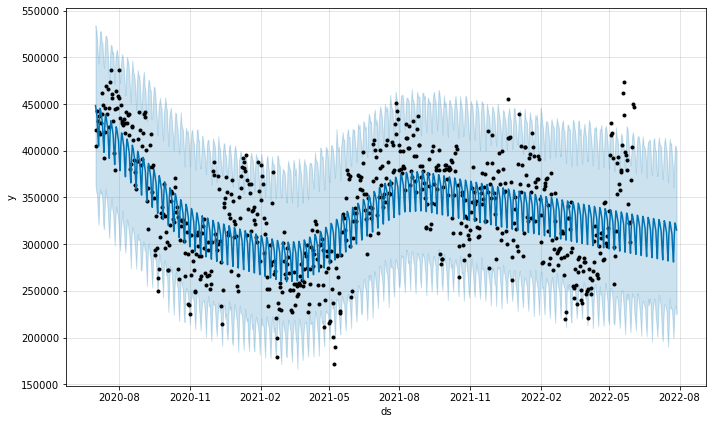

In [68]:
# plot the predictions
Model_gas.plot(results_gas);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

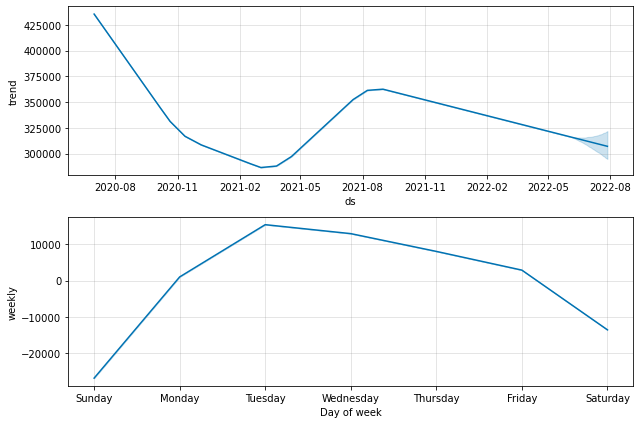

In [69]:
# Plot model components
Model_gas.plot_components(results_gas);

### Conclusion:
- PMDArima
    - The test predictions and the actually test data was off. The test data was higher than that of the predictions.
- FBProphet
    - The observed values follow a trend but is not comparable to that of  the forecasted values with some falling outside the uncertainty interval.

## Future Dates Gas
- Above we looked at how the models predicted existing data and learned from the past. 
- Below we will take the same process and apply it to future data to predict data we do not have. 

In [70]:
df_gas_pr = df_gas.reset_index()
df_gas_pr
# resetting the index for the df_gas dataframe and turning it back into a column for the labeling of ds and y.

period   value
0   2020-07-01  405505
1   2020-07-02  422388
2   2020-07-03  442867
3   2020-07-04  432224
4   2020-07-05  420461
..         ...     ...
753 2022-07-24  433478
754 2022-07-25  454320
755 2022-07-26  463345
756 2022-07-27  475039
757 2022-07-28  482369

[758 rows x 2 columns]

In [71]:
df_gas_pr = df_gas_pr.rename(columns = {'period': 'ds', 'value': 'y'})
df_gas_pr
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

ds       y
0   2020-07-01  405505
1   2020-07-02  422388
2   2020-07-03  442867
3   2020-07-04  432224
4   2020-07-05  420461
..         ...     ...
753 2022-07-24  433478
754 2022-07-25  454320
755 2022-07-26  463345
756 2022-07-27  475039
757 2022-07-28  482369

[758 rows x 2 columns]

In [72]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_df_gas = Prophet(interval_width = 0.95)

Model_df_gas.fit(df_gas_pr)

10:21:24 - cmdstanpy - INFO - Chain [1] start processing
10:21:26 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_df_gas = Model_df_gas.make_future_dataframe(periods = 56, freq = 'D')

In [74]:
#Predict the future dates and values
results_df_gas = Model_df_gas.predict(df = future_df_gas)

results_df_gas.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
809 2022-09-18  409015.563439  322586.810415  452714.532554  406883.818734   
810 2022-09-19  409224.131297  342457.631284  479260.992429  407030.895240   
811 2022-09-20  409432.699154  361696.529181  494856.157716  407182.279545   
812 2022-09-21  409641.267011  358673.546989  491630.529285  407333.663851   
813 2022-09-22  409849.834868  352640.934251  481224.727011  407485.048157   

       trend_upper  additive_terms  additive_terms_lower  \
809  410849.253775   -22019.567838         -22019.567838   
810  411092.435218     3531.796235           3531.796235   
811  411337.055499    16669.954958          16669.954958   
812  411594.666734    13693.187172          13693.187172   
813  411852.277969     7915.089025           7915.089025   

     additive_terms_upper        weekly  weekly_lower  weekly_upper  \
809         -22019.567838 -27568.440736 -27568.440736 -27568.440736   
810           3531.796235     99.725261     99.725261     99.725261   
811          16669.954958  15045.385651  15045.385651  15045.385651   
812          13693.187172  13547.036425  13547.036425  13547.036425   
813           7915.089025   8905.641886   8905.641886   8905.641886   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
809  5548.872897   5548.872897   5548.872897                   0.0   
810  3432.070974   3432.070974   3432.070974                   0.0   
811  1624.569307   1624.569307   1624.569307                   0.0   
812   146.150747    146.150747    146.150747                   0.0   
813  -990.552861   -990.552861   -990.552861                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper           yhat  
809                         0.0                         0.0  386995.995601  
810                         0.0                         0.0  412755.927531  
811                         0.0                         0.0  426102.654112  
812                         0.0                         0.0  423334.454183  
813                         0.0                         0.0  417764.923893

In [75]:
results_df_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds           yhat     yhat_lower     yhat_upper
0   2020-07-01  436590.275543  371282.191077  499574.928535
1   2020-07-02  431084.111952  365094.488656  496740.868763
2   2020-07-03  425022.125447  355855.129449  491570.576450
3   2020-07-04  406515.715117  337942.711823  472427.508524
4   2020-07-05  391817.229880  326300.093190  459328.533296
..         ...            ...            ...            ...
809 2022-09-18  386995.995601  322586.810415  452714.532554
810 2022-09-19  412755.927531  342457.631284  479260.992429
811 2022-09-20  426102.654112  361696.529181  494856.157716
812 2022-09-21  423334.454183  358673.546989  491630.529285
813 2022-09-22  417764.923893  352640.934251  481224.727011

[814 rows x 4 columns]

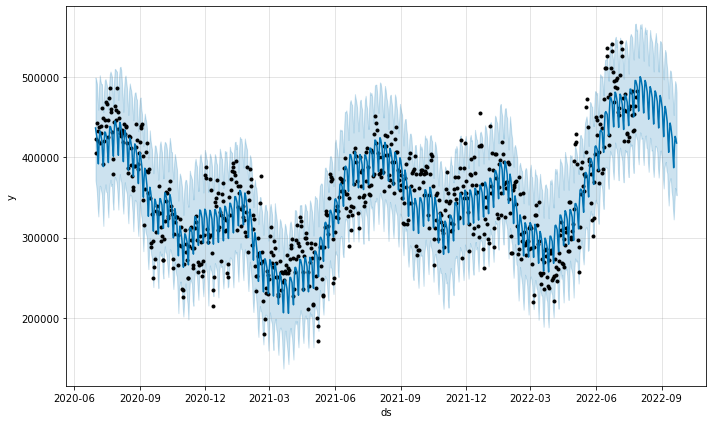

In [76]:
# plot the predictions
Model_df_gas.plot(results_df_gas);


Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

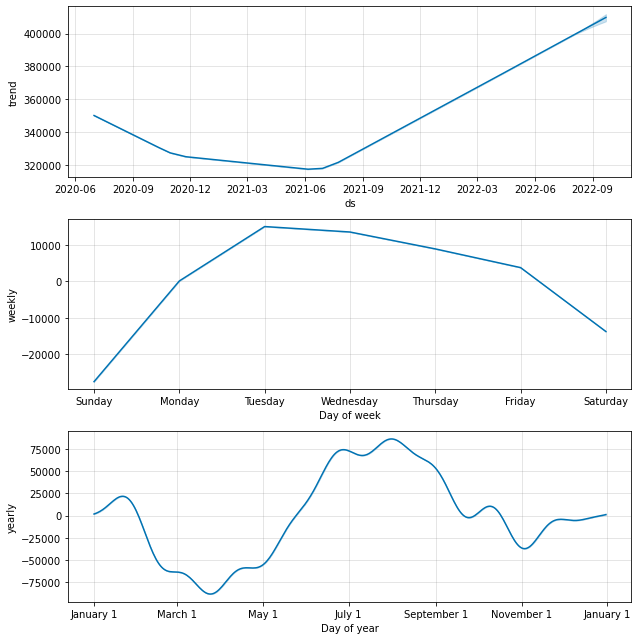

In [77]:
# Plot model components
Model_df_gas.plot_components(results_df_gas);

### Conclusion:
- The Prediction Plot follows a clear prediciton and can be used to better predict future gas production.
- Majority of the observed values fall within the uncertainty interval or follows the trend.

## PMDArima Oil

In [78]:
adf_test_oil = ADFTest()

adf_test_oil = ADFTest(alpha=0.05)
p_val_oil, should_diff_oil = adf_test_oil.should_diff(df_oil) 

print(f"P-Value: {p_val_oil}, so should you difference the data? {should_diff_oil}")

P-Value: 0.01, so should you difference the data? False


In [79]:
arima_oil = auto_arima(train_oil,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.31 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7145.325, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7145.512, Time=0.47 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7144.366, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=7144.631, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=7146.736, Time=0.20 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=7143.026, Time=1.42 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=7145.386, Time=0.35 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=7137.365, Time=3.90 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=7136.329, Time=2.46 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=7134.545, Time=2.30 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=7144.100, Time=0.41 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=7135.470, Time=3.32 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=7141.810, Time=0.85 sec
 ARIMA(1,0,0)(2,0,0)[12]

In [80]:
arima_oil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  702
Model:             SARIMAX(2, 0, 0, 12)   Log Likelihood               -3564.183
Date:                  Wed, 10 Aug 2022   AIC                           7134.365
Time:                          10:22:04   BIC                           7148.027
Sample:                               0   HQIC                          7139.646
                                  - 702                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0745      0.058     -1.289      0.198      -0.188       0.039
ar.S.L24      -0.1272      0.055     -2.328      0.020      -0.234      -0.020
sigma2      1503.8451     18.694     80.446      0.000    1467.206    1540.484
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             55950.39
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             5.01
Prob(H) (two-sided):                  0.19   Kurtosis:                        45.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
test_preds_oil = pd.Series(arima_oil.predict(n_periods=len(test_oil)), index=test_oil.index)

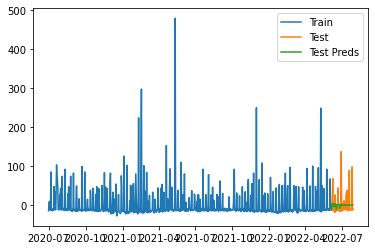

In [82]:
plt.plot(train_oil, label = 'Train')
plt.plot(test_oil, label = 'Test')
plt.plot(test_preds_oil, label = 'Test Preds')
plt.legend();

In [83]:
# Fit the best fit model from grid search SARIMAX(3, 0, 2)(0, 0, 0, 12)
seas_arima_oil = ARIMA(train_oil,
                   order=(0, 0, 0),
                   seasonal_order=(2, 0, 0, 12))
res_sarima_oil = seas_arima_oil.fit()

# Print out summary information on the fit
print(res_sarima_oil.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  702
Model:             ARIMA(2, 0, 0, 12)   Log Likelihood               -3563.273
Date:                Wed, 10 Aug 2022   AIC                           7134.545
Time:                        10:22:06   BIC                           7152.761
Sample:                    07-01-2020   HQIC                          7141.586
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6509      1.978      0.834      0.404      -2.227       5.529
ar.S.L12      -0.0768      0.060     -1.272      0.203      -0.195       0.042
ar.S.L24      -0.1290      0.056     -2.284      0.0

### FBProphet Oil

In [84]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_oil = Prophet(interval_width = 0.95)

In [85]:
train_oil_pr = train_oil.reset_index()
train_oil_pr
# resetting the index for the train_gas dataframe

period  value
0   2020-07-01    -15
1   2020-07-02     -2
2   2020-07-03      9
3   2020-07-04    -12
4   2020-07-05    -13
..         ...    ...
697 2022-05-29     -9
698 2022-05-30    -14
699 2022-05-31    -10
700 2022-06-01     67
701 2022-06-02    -11

[702 rows x 2 columns]

In [86]:
train_oil_pr = train_oil_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

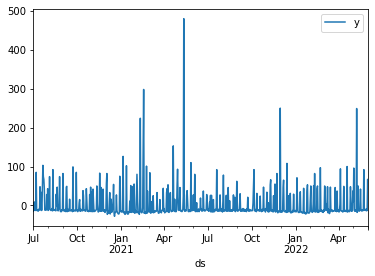

In [87]:
train_oil_pr.plot(y = 'y', x = 'ds')

In [88]:
# Fit the timeseries to Model_'energy source'
Model_oil.fit(train_oil_pr)

10:22:06 - cmdstanpy - INFO - Chain [1] start processing
10:22:08 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_oil = Model_oil.make_future_dataframe(periods = 56, freq = 'D')

In [90]:
#Predict the future dates and values
results_oil = Model_oil.predict(df = future_oil)

results_oil.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
753 2022-07-24 -0.486147  -86.514264   50.784671    -0.499350    -0.470826   
754 2022-07-25 -0.490420  -70.476389   56.620724    -0.503969    -0.474566   
755 2022-07-26 -0.494693  -22.105844  113.511349    -0.508583    -0.478502   
756 2022-07-27 -0.498966  -53.470160   76.065644    -0.513353    -0.482524   
757 2022-07-28 -0.503239  -76.744868   59.450876    -0.518194    -0.486348   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
753      -15.572073            -15.572073            -15.572073 -15.572073   
754       -8.426309             -8.426309             -8.426309  -8.426309   
755       42.079477             42.079477             42.079477  42.079477   
756       11.015826             11.015826             11.015826  11.015826   
757       -6.275438             -6.275438             -6.275438  -6.275438   

     weekly_lower  weekly_upper  multiplicative_terms  \
753    -15.572073    -15.572073                   0.0   
754     -8.426309     -8.426309                   0.0   
755     42.079477     42.079477                   0.0   
756     11.015826     11.015826                   0.0   
757     -6.275438     -6.275438                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
753                         0.0                         0.0 -16.058220  
754                         0.0                         0.0  -8.916729  
755                         0.0                         0.0  41.584784  
756                         0.0                         0.0  10.516860  
757                         0.0                         0.0  -6.778677

In [91]:
results_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0   2020-07-01  15.077481  -47.742096   80.317628
1   2020-07-02  -2.220984  -67.439586   66.454352
2   2020-07-03  -2.806374  -72.068490   63.000717
3   2020-07-04 -11.927799  -81.219459   54.261542
4   2020-07-05 -11.539218  -76.759916   52.878715
..         ...        ...         ...         ...
753 2022-07-24 -16.058220  -86.514264   50.784671
754 2022-07-25  -8.916729  -70.476389   56.620724
755 2022-07-26  41.584784  -22.105844  113.511349
756 2022-07-27  10.516860  -53.470160   76.065644
757 2022-07-28  -6.778677  -76.744868   59.450876

[758 rows x 4 columns]

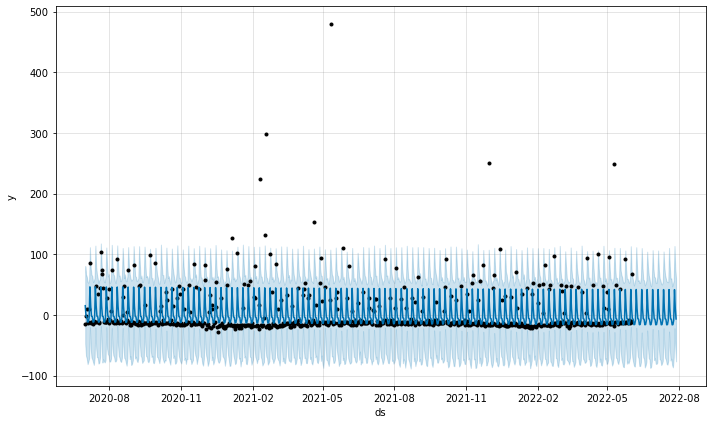

In [92]:
# plot the predictions
Model_oil.plot(results_oil);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

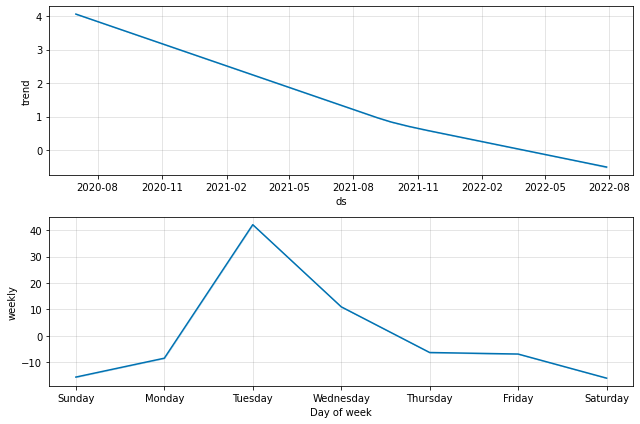

In [93]:
# Plot model components
Model_oil.plot_components(results_oil);

#### Conclusion:
- PMDArima
    - The test predictions fit within the test data.
- FBProphet
    - The observed values follow a trend of being close to `0`, when compared to that of  the forecasted values they fall of the bottom half with some falling outside the top of the uncertainty interval.

## Future Dates Oil
- Above we looked at how the models predicted existing data and learned from the past. 
- Below we will take the same process and apply it to future data to predict data we do not have. 

In [226]:
df_oil_pr = df_oil.reset_index()
df_oil_pr.head(2)
# resetting the index for the df_gas dataframe and turning it back into a column for the labeling of ds and y.

period  value
0 2020-07-01    -15
1 2020-07-02     -2

In [228]:
df_oil_pr = df_oil_pr.rename(columns = {'period': 'ds', 'value': 'y'})
df_oil_pr.head(2)
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

ds   y
0 2020-07-01 -15
1 2020-07-02  -2

In [229]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_df_oil = Prophet(interval_width = 0.95)

Model_df_oil.fit(df_oil_pr)

12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing


In [230]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_df_oil = Model_df_oil.make_future_dataframe(periods = 56, freq = 'D')

In [231]:
#Predict the future dates and values
results_df_oil = Model_df_oil.predict(df = future_df_oil)

results_df_oil.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
809 2022-09-18 -2.886556  -86.399935   38.736469    -2.888641    -2.884534   
810 2022-09-19 -2.896758  -82.559437   42.401161    -2.898891    -2.894708   
811 2022-09-20 -2.906960  -34.711451  100.810619    -2.909141    -2.904882   
812 2022-09-21 -2.917162  -58.937824   64.968762    -2.919391    -2.915057   
813 2022-09-22 -2.927364  -82.924039   45.141267    -2.929641    -2.925219   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
809      -23.897952            -23.897952            -23.897952 -15.412274   
810      -16.705291            -16.705291            -16.705291  -8.246780   
811       33.388457             33.388457             33.388457  41.765874   
812        3.272794              3.272794              3.272794  11.517637   
813      -14.432887            -14.432887            -14.432887  -6.368563   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
809    -15.412274    -15.412274 -8.485678     -8.485678     -8.485678   
810     -8.246780     -8.246780 -8.458511     -8.458511     -8.458511   
811     41.765874     41.765874 -8.377417     -8.377417     -8.377417   
812     11.517637     11.517637 -8.244843     -8.244843     -8.244843   
813     -6.368563     -6.368563 -8.064324     -8.064324     -8.064324   

     multiplicative_terms  multiplicative_terms_lower  \
809                   0.0                         0.0   
810                   0.0                         0.0   
811                   0.0                         0.0   
812                   0.0                         0.0   
813                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
809                         0.0 -26.784508  
810                         0.0 -19.602049  
811                         0.0  30.481497  
812                         0.0   0.355632  
813                         0.0 -17.360251

In [234]:
results_df_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0   2020-07-01  13.617318  -49.621064   78.065468
1   2020-07-02  -3.961873  -70.491702   58.604515
2   2020-07-03  -4.599717  -76.189951   59.352077
3   2020-07-04 -12.650162  -77.831833   54.341548
4   2020-07-05 -11.686169  -75.838002   50.828803
..         ...        ...         ...         ...
809 2022-09-18 -26.784508  -86.399935   38.736469
810 2022-09-19 -19.602049  -82.559437   42.401161
811 2022-09-20  30.481497  -34.711451  100.810619
812 2022-09-21   0.355632  -58.937824   64.968762
813 2022-09-22 -17.360251  -82.924039   45.141267

[814 rows x 4 columns]

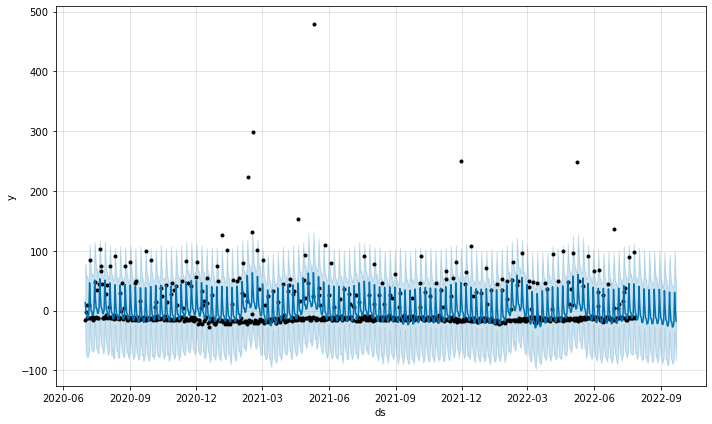

In [235]:
# plot the predictions
Model_df_oil.plot(results_df_oil);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

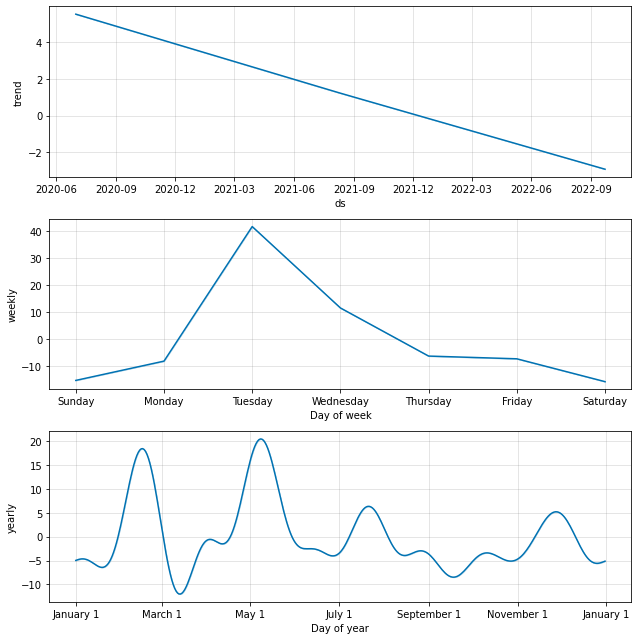

In [236]:
# Plot model components
Model_df_oil.plot_components(results_df_oil);

### Conclusion:
- The Prediction Plot follows a similar model to that of the original FBProphet, the trend differs slightly with increases between February and May of both years.

## PMDArima Sun

In [94]:
adf_test_sun = ADFTest()

adf_test_sun = ADFTest(alpha=0.05)
p_val_sun, should_diff_sun = adf_test_sun.should_diff(df_sun) 

print(f"P-Value: {p_val_sun}, so should you difference the data? {should_diff_sun}")

P-Value: 0.01, so should you difference the data? False


In [95]:
arima_sun = auto_arima(train_sun,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=14258.400, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=14236.264, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=14173.804, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=14256.401, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=14172.372, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=14173.779, Time=0.50 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=14175.672, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=14066.680, Time=0.48 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=14060.634, Time=2.69 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=14070.397, Time=4.98 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=14070.721, Time=2.64 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=14068.620, Time=1.77 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=14072.683, Time=5.39 sec
 ARIMA(2,1,

In [96]:
arima_sun.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  702
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -7019.027
Date:                Wed, 10 Aug 2022   AIC                          14046.055
Time:                        10:23:38   BIC                          14064.265
Sample:                             0   HQIC                         14053.093
                                - 702                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4642      0.034    -13.546      0.000      -0.531      -0.397
ma.L2         -0.3898      0.033    -11.971      0.000      -0.454      -0.326
ma.L3         -0.0597      0.032     -1.837      0.066      -0.123       0.004
sigma2      3.135e+07   5.28e-10   5.94e+16      0.000    3.14e+07    3.14e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                23.40
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [97]:
test_preds_sun = pd.Series(arima_sun.predict(n_periods=len(test_sun)), index=test_sun.index)

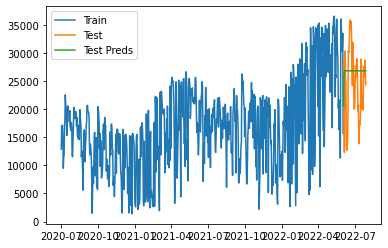

In [98]:
plt.plot(train_sun, label = 'Train')
plt.plot(test_sun, label = 'Test')
plt.plot(test_preds_sun, label = 'Test Preds')
plt.legend();

In [99]:
# Fit the best fit model from grid search SARIMAX(0, 1, 2)x(0, 0, 0, 12)
seas_arima_sun = ARIMA(train_sun,
                   order=(0, 1, 3),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_sun = seas_arima_sun.fit()

# Print out summary information on the fit
print(res_sarima_sun.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  702
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -7019.027
Date:                Wed, 10 Aug 2022   AIC                          14046.055
Time:                        10:23:39   BIC                          14064.265
Sample:                    07-01-2020   HQIC                         14053.093
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4642      0.034    -13.546      0.000      -0.531      -0.397
ma.L2         -0.3898      0.033    -11.971      0.000      -0.454      -0.326
ma.L3         -0.0597      0.032     -1.837      0.0

## FBProphet Sun

In [100]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_sun = Prophet(interval_width = 0.95)

In [101]:
train_sun_pr = train_sun.reset_index()
train_sun_pr
# resetting the index for the train_gas dataframe

period  value
0   2020-07-01  12912
1   2020-07-02  17038
2   2020-07-03  17001
3   2020-07-04  17148
4   2020-07-05  14474
..         ...    ...
697 2022-05-29  32818
698 2022-05-30  30326
699 2022-05-31  30855
700 2022-06-01  33525
701 2022-06-02  15672

[702 rows x 2 columns]

In [102]:
train_sun_pr = train_sun_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

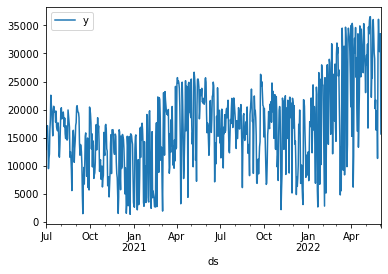

In [103]:
train_sun_pr.plot(y = 'y', x = 'ds')

In [104]:
# Fit the timeseries to Model_'energy source'
Model_sun.fit(train_sun_pr)

10:23:39 - cmdstanpy - INFO - Chain [1] start processing
10:23:41 - cmdstanpy - INFO - Chain [1] done processing


In [105]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_sun = Model_sun.make_future_dataframe(periods = 56, freq = 'D')

In [106]:
#Predict the future dates and values
results_sun = Model_sun.predict(df = future_sun)

results_sun.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
753 2022-07-24  29657.869274  18090.535419  41786.306057  29417.709944   
754 2022-07-25  29709.966799  17419.060713  41702.143501  29462.601670   
755 2022-07-26  29762.064324  17159.760986  41686.385830  29506.559615   
756 2022-07-27  29814.161849  17140.791769  42153.224462  29549.817358   
757 2022-07-28  29866.259374  18046.563747  41142.693313  29593.640753   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
753  29910.659227      336.291750            336.291750            336.291750   
754  29969.581436       27.487263             27.487263             27.487263   
755  30029.975992       84.201639             84.201639             84.201639   
756  30088.628600      -32.589754            -32.589754            -32.589754   
757  30150.575510     -419.966043           -419.966043           -419.966043   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
753  336.291750    336.291750    336.291750                   0.0   
754   27.487263     27.487263     27.487263                   0.0   
755   84.201639     84.201639     84.201639                   0.0   
756  -32.589754    -32.589754    -32.589754                   0.0   
757 -419.966043   -419.966043   -419.966043                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
753                         0.0                         0.0  29994.161024  
754                         0.0                         0.0  29737.454062  
755                         0.0                         0.0  29846.265963  
756                         0.0                         0.0  29781.572095  
757                         0.0                         0.0  29446.293331

In [107]:
results_sun[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2020-07-01  13552.563821    493.309431  25976.498219
1   2020-07-02  13165.600415   1264.664084  25531.808575
2   2020-07-03  13337.587139    469.075696  25823.045554
3   2020-07-04  13839.359572   1551.011051  26419.384916
4   2020-07-05  13923.096858   1250.483074  26798.354730
..         ...           ...           ...           ...
753 2022-07-24  29994.161024  18090.535419  41786.306057
754 2022-07-25  29737.454062  17419.060713  41702.143501
755 2022-07-26  29846.265963  17159.760986  41686.385830
756 2022-07-27  29781.572095  17140.791769  42153.224462
757 2022-07-28  29446.293331  18046.563747  41142.693313

[758 rows x 4 columns]

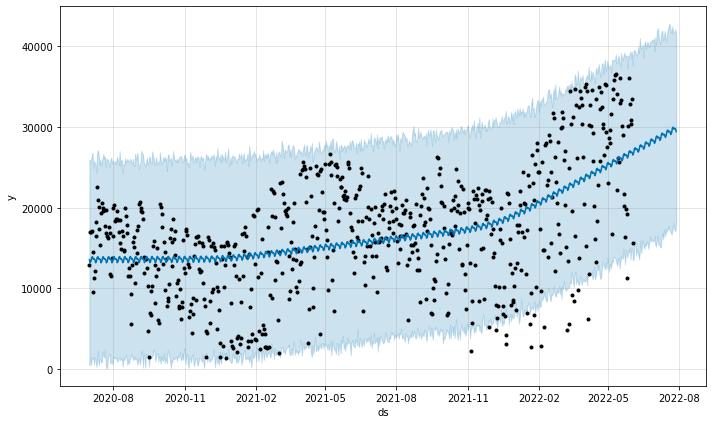

In [108]:
# plot the predictions
Model_sun.plot(results_sun);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

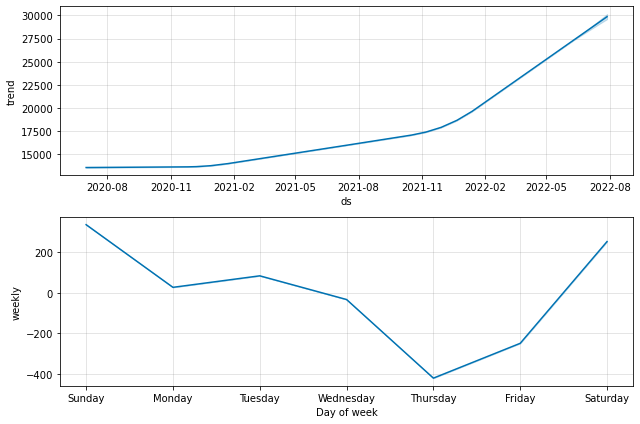

In [109]:
# Plot model components
Model_sun.plot_components(results_sun);

### Conclusion:
- PMDArima
    - The test predictions fit within the test data.
- FBProphet
    - The observed values do not follow a trend and is not comparable to that of the forecasted values. The observed values fall within the uncertainty interval with a few falling below.

## Future Dates Solar
- Above we looked at how the models predicted existing data and learned from the past. 
- Below we will take the same process and apply it to future data to predict data we do not have. 

In [237]:
df_sun_pr = df_sun.reset_index()
df_sun_pr.head(2)
# resetting the index for the df_gas dataframe and turning it back into a column for the labeling of ds and y.

period  value
0 2020-07-01  12912
1 2020-07-02  17038

In [238]:
df_sun_pr = df_sun_pr.rename(columns = {'period': 'ds', 'value': 'y'})
df_sun_pr.head(2)
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

ds      y
0 2020-07-01  12912
1 2020-07-02  17038

In [239]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_df_sun = Prophet(interval_width = 0.95)

Model_df_sun.fit(df_sun_pr)

13:00:10 - cmdstanpy - INFO - Chain [1] start processing
13:00:16 - cmdstanpy - INFO - Chain [1] done processing


In [240]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_df_sun = Model_df_sun.make_future_dataframe(periods = 56, freq = 'D')

In [242]:
#Predict the future dates and values
results_df_sun = Model_df_sun.predict(df = future_df_sun)

results_df_sun.tail(2)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
812 2022-09-21  25195.433793  11301.829959  33989.485180  25115.535454   
813 2022-09-22  25216.132516  10605.678271  32973.739073  25134.966012   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
812  25276.168681    -2383.595409          -2383.595409          -2383.595409   
813  25298.768111    -2843.187195          -2843.187195          -2843.187195   

         weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
812   41.414830     41.414830     41.414830 -2425.010238  -2425.010238   
813 -382.035834   -382.035834   -382.035834 -2461.151362  -2461.151362   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
812  -2425.010238                   0.0                         0.0   
813  -2461.151362                   0.0                         0.0   

     multiplicative_terms_upper          yhat  
812                         0.0  22811.838385  
813                         0.0  22372.945321

In [243]:
results_df_sun[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2020-07-01  15265.674071   4287.630349  25808.189009
1   2020-07-02  14601.918624   4370.089421  25055.922791
2   2020-07-03  14406.190835   3249.416915  25938.006223
3   2020-07-04  14771.603325   3954.569901  25275.855456
4   2020-07-05  14673.375102   3852.993059  25884.422870
..         ...           ...           ...           ...
809 2022-09-18  23325.734768  12180.477599  34462.580838
810 2022-09-19  22913.218353  12035.945816  34421.110817
811 2022-09-20  22949.266075  12580.760008  34471.204430
812 2022-09-21  22811.838385  11301.829959  33989.485180
813 2022-09-22  22372.945321  10605.678271  32973.739073

[814 rows x 4 columns]

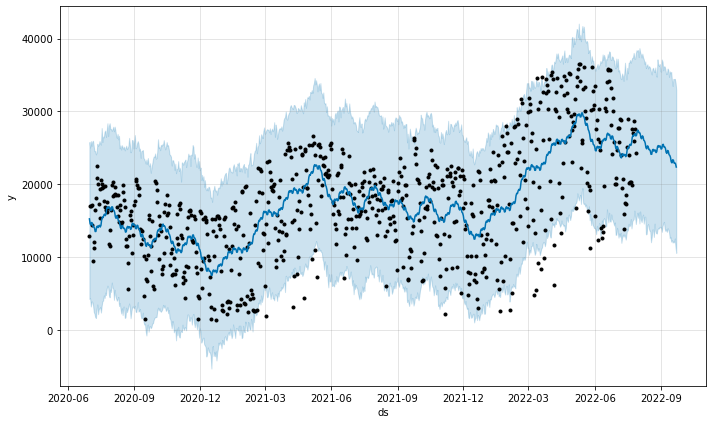

In [244]:
# plot the predictions
Model_df_sun.plot(results_df_sun);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

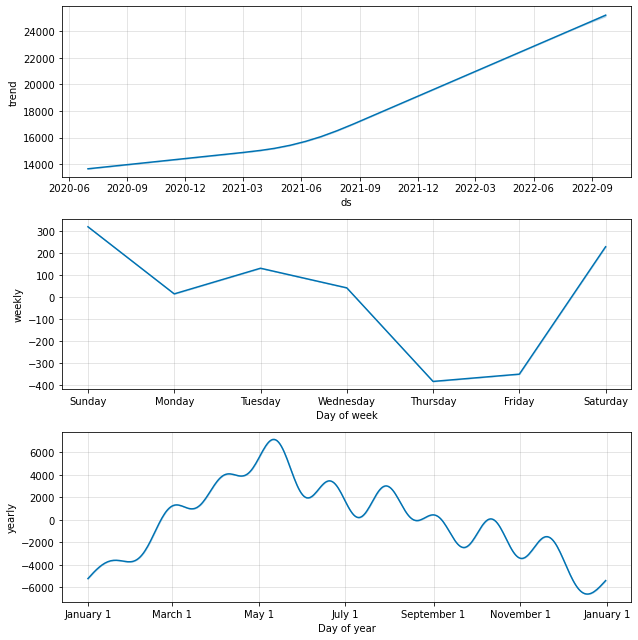

In [245]:
# Plot model components
Model_df_sun.plot_components(results_df_sun);

### Conclusion:
- The Prediction Plot follows a clear prediciton and can be used to better predict future solar production.
- Majority of the observed values fall within the uncertainty interval or follows the trend.

### PMDArima Hydro

In [110]:
adf_test_hydro = ADFTest()

adf_test_hydro = ADFTest(alpha=0.05)
p_val_hydro, should_diff_hydro = adf_test_hydro.should_diff(df_hydro) 

print(f"P-Value: {p_val_hydro}, so should you difference the data? {should_diff_hydro}")

P-Value: 0.01, so should you difference the data? False


In [111]:
arima_hydro = auto_arima(train_hydro,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=13664.442, Time=2.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13758.076, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13724.143, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13711.334, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13756.079, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=13664.773, Time=2.41 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=13665.380, Time=1.99 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=13661.895, Time=5.49 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=13659.916, Time=4.44 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=13700.081, Time=1.19 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=13704.704, Time=2.10 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=10.24 sec
 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=13661.774, Time=6.72 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=13707.116, Time=1.03 sec
 ARIMA(0,1

In [112]:
arima_hydro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  702
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -6822.963
Date:                             Wed, 10 Aug 2022   AIC                          13657.927
Time:                                     10:25:05   BIC                          13685.242
Sample:                                          0   HQIC                         13668.485
                                             - 702                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7579      0.040     19.082      0.000       0.680       0.836
ma.L1         -0.5909      0.046    -12.836      0.000      -0.681      -0.501
ma.L2         -0.3385      0.038     -8.996      0.000      -0.412      -0.265
ar.S.L12      -0.0728      0.040     -1.839      0.066      -0.150       0.005
ar.S.L24      -0.1083      0.037     -2.933      0.003      -0.181      -0.036
sigma2      1.755e+07      1e-09   1.75e+16      0.000    1.75e+07    1.75e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               216.49
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             0.85
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.7e+31. Standard errors may be unstable.
"""

In [113]:
test_preds_hydro = pd.Series(arima_hydro.predict(n_periods=len(test_hydro)), index=test_hydro.index)

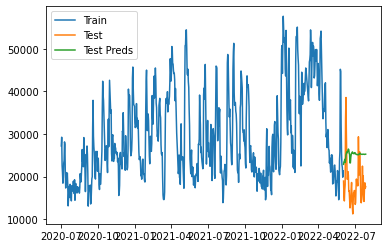

In [114]:
plt.plot(train_hydro, label = 'Train')
plt.plot(test_hydro, label = 'Test')
plt.plot(test_preds_hydro, label = 'Test Preds')
plt.legend();

### Conclusion:
- PMDArima
    - The test predictions and the actually test data was off. The test data lower than .
- FBProphet
    - The observed values follow a trend but is not comparable to that of  the forecasted values with some falling outside the uncertainty interval.

In [115]:
# Fit the best fit model from grid search SARIMAX(1, 1, 2)x(0, 0, 0, 12)
seas_arima_hydro = ARIMA(train_sun,
                   order=(1, 1, 2),
                   seasonal_order=(2, 0, 0, 12))
res_sarima_hydro = seas_arima_hydro.fit()

# Print out summary information on the fit
print(res_sarima_hydro.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  702
Model:             ARIMA(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -7019.652
Date:                           Wed, 10 Aug 2022   AIC                          14051.304
Time:                                   10:25:08   BIC                          14078.619
Sample:                               07-01-2020   HQIC                         14061.862
                                    - 06-02-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1282      0.079      1.616      0.106      -0.027       0.284
ma.L1         -0.5947      0.075     -7.886

### FBProphet Hydro

In [116]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_hydro = Prophet(interval_width = 0.95)

In [117]:
train_hydro_pr = train_hydro.reset_index()
train_hydro_pr
# resetting the index for the train_gas dataframe

period  value
0   2020-07-01  27192
1   2020-07-02  29241
2   2020-07-03  22585
3   2020-07-04  20934
4   2020-07-05  18464
..         ...    ...
697 2022-05-29  25462
698 2022-05-30  22769
699 2022-05-31  22096
700 2022-06-01  19868
701 2022-06-02  21344

[702 rows x 2 columns]

In [118]:
train_hydro_pr = train_hydro_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

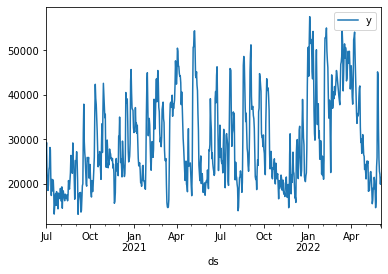

In [119]:
train_hydro_pr.plot(y = 'y', x = 'ds')

In [120]:
# Fit the timeseries to Model_'energy source'
Model_hydro.fit(train_hydro_pr)

10:25:09 - cmdstanpy - INFO - Chain [1] start processing
10:25:10 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_hydro = Model_hydro.make_future_dataframe(periods = 56, freq = 'D')

In [122]:
#Predict the future dates and values
results_hydro = Model_hydro.predict(df = future_hydro)

results_hydro.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
753 2022-07-24  34496.226570  15467.570741  50889.832704  34388.881579   
754 2022-07-25  34506.358692  16586.398232  52254.191873  34396.852638   
755 2022-07-26  34516.490815  16676.201610  53445.348596  34399.792752   
756 2022-07-27  34526.622937  17294.647138  53362.405501  34405.543569   
757 2022-07-28  34536.755060  17406.730164  54177.897529  34413.408430   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
753  34618.957603    -2033.237858          -2033.237858          -2033.237858   
754  34631.422304     -568.690559           -568.690559           -568.690559   
755  34645.174808      371.541372            371.541372            371.541372   
756  34659.853487      769.620846            769.620846            769.620846   
757  34674.532166     1048.916196           1048.916196           1048.916196   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
753 -2033.237858  -2033.237858  -2033.237858                   0.0   
754  -568.690559   -568.690559   -568.690559                   0.0   
755   371.541372    371.541372    371.541372                   0.0   
756   769.620846    769.620846    769.620846                   0.0   
757  1048.916196   1048.916196   1048.916196                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
753                         0.0                         0.0  32462.988712  
754                         0.0                         0.0  33937.668133  
755                         0.0                         0.0  34888.032187  
756                         0.0                         0.0  35296.243783  
757                         0.0                         0.0  35585.671256

In [123]:
results_hydro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2020-07-01  22343.327001   4910.008920  40109.633941
1   2020-07-02  22655.524996   4000.386477  40966.109633
2   2020-07-03  23071.538536   3236.641246  41587.652740
3   2020-07-04  20652.237001   2839.032373  38351.554068
4   2020-07-05  19672.078877   1147.136564  37311.545894
..         ...           ...           ...           ...
753 2022-07-24  32462.988712  15467.570741  50889.832704
754 2022-07-25  33937.668133  16586.398232  52254.191873
755 2022-07-26  34888.032187  16676.201610  53445.348596
756 2022-07-27  35296.243783  17294.647138  53362.405501
757 2022-07-28  35585.671256  17406.730164  54177.897529

[758 rows x 4 columns]

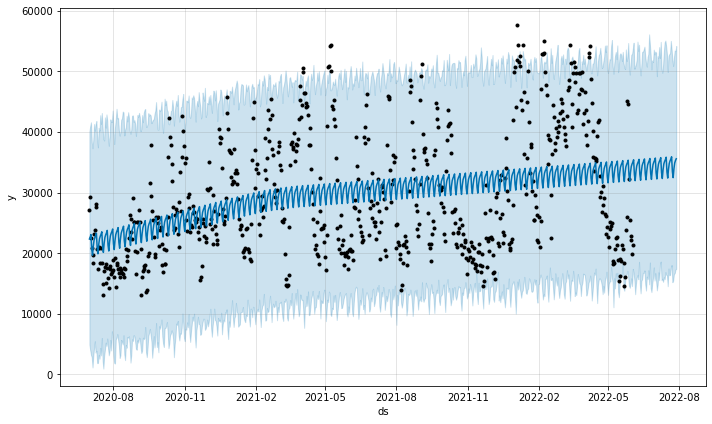

In [124]:
# plot the predictions
Model_hydro.plot(results_hydro);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

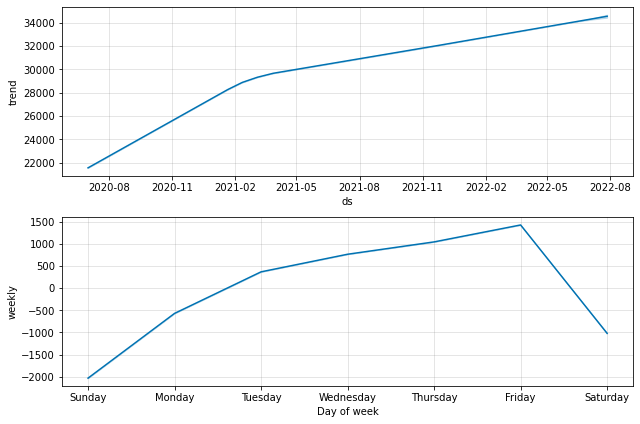

In [125]:
# Plot model components
Model_hydro.plot_components(results_hydro);

## Future Dates Hydro
- Above we looked at how the models predicted existing data and learned from the past. 
- Below we will take the same process and apply it to future data to predict data we do not have. 

In [246]:
df_hydro_pr = df_hydro.reset_index()
df_hydro_pr.head(2)
# resetting the index for the df_gas dataframe and turning it back into a column for the labeling of ds and y.

period  value
0 2020-07-01  27192
1 2020-07-02  29241

In [247]:
df_hydro_pr = df_hydro_pr.rename(columns = {'period': 'ds', 'value': 'y'})
df_hydro_pr.head(2)
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

ds      y
0 2020-07-01  27192
1 2020-07-02  29241

In [248]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_df_hydro = Prophet(interval_width = 0.95)

Model_df_hydro.fit(df_hydro_pr)

13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:12 - cmdstanpy - INFO - Chain [1] done processing


In [249]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_df_hydro = Model_df_hydro.make_future_dataframe(periods = 56, freq = 'D')

In [250]:
#Predict the future dates and values
results_df_hydro = Model_df_hydro.predict(df = future_df_hydro)

results_df_hydro.tail(2)

ds         trend   yhat_lower    yhat_upper   trend_lower  \
812 2022-09-21  22792.001840  6750.660133  35611.186064  22502.596424   
813 2022-09-22  22754.698185  6235.057472  34711.544674  22461.844222   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
812  23073.112981    -1856.824777          -1856.824777          -1856.824777   
813  23042.521403    -1386.942949          -1386.942949          -1386.942949   

          weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
812   978.804097    978.804097    978.804097 -2835.628874  -2835.628874   
813  1225.117218   1225.117218   1225.117218 -2612.060167  -2612.060167   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
812  -2835.628874                   0.0                         0.0   
813  -2612.060167                   0.0                         0.0   

     multiplicative_terms_upper          yhat  
812                         0.0  20935.177063  
813                         0.0  21367.755236

In [251]:
results_df_hydro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat   yhat_lower    yhat_upper
0   2020-07-01  20604.377196  6572.875007  35857.317404
1   2020-07-02  20858.482519  6490.356872  35822.218706
2   2020-07-03  21018.109111  5607.011300  34799.571612
3   2020-07-04  18586.079321  3061.080238  33076.106563
4   2020-07-05  17786.714906  2288.172323  32588.480292
..         ...           ...          ...           ...
809 2022-09-18  17588.129190  2887.092356  32070.191619
810 2022-09-19  19077.576891  4346.668118  33876.240112
811 2022-09-20  20141.035161  6607.296627  35592.820404
812 2022-09-21  20935.177063  6750.660133  35611.186064
813 2022-09-22  21367.755236  6235.057472  34711.544674

[814 rows x 4 columns]

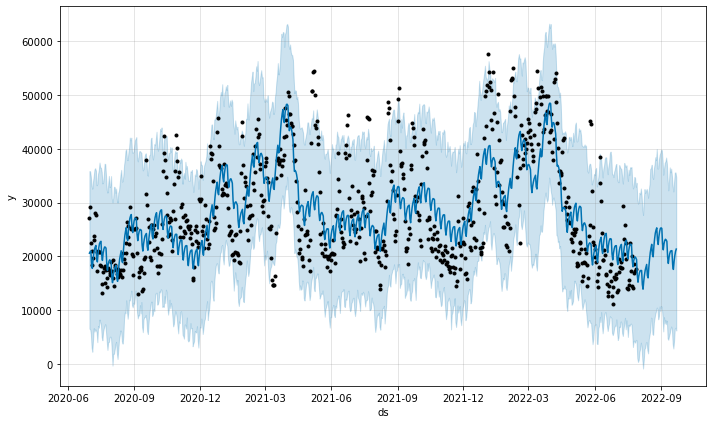

In [252]:
# plot the predictions
Model_df_hydro.plot(results_df_hydro);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

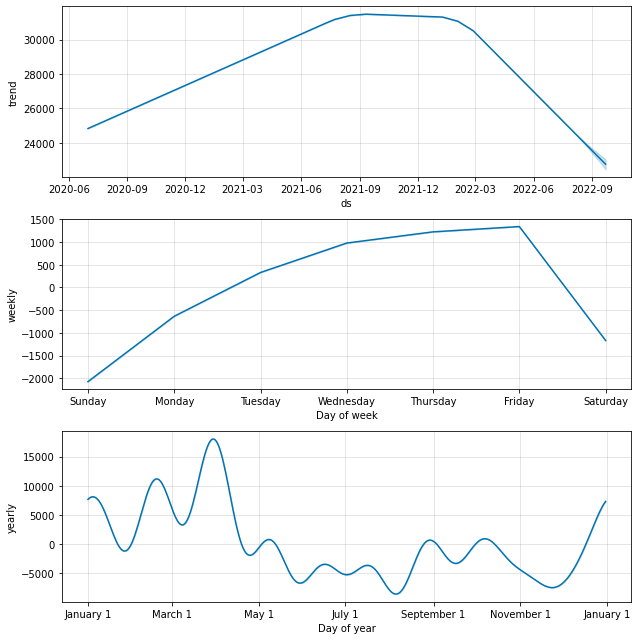

In [253]:
# Plot model components
Model_df_hydro.plot_components(results_df_hydro);

### Conclusion:
- The Prediction Plot follows a clear prediciton and can be used to better predict future gas production.
- Majority of the observed values fall within the uncertainty interval or follows the trend.

### PMDArima Nuclear

In [126]:
adf_test_nuc = ADFTest()

adf_test_nuc = ADFTest(alpha=0.05)
p_val_nuc, should_diff_nuc = adf_test_nuc.should_diff(df_nuc) 

print(f"P-Value: {p_val_nuc}, so should you difference the data? {should_diff_nuc}")

P-Value: 0.01, so should you difference the data? False


In [127]:
arima_nuc = auto_arima(train_nuc,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=13528.713, Time=4.31 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=15217.358, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=13595.860, Time=1.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=14716.572, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=18551.521, Time=0.02 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=13527.978, Time=0.72 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=13527.031, Time=0.17 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=13528.319, Time=2.39 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=14031.869, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=13526.085, Time=0.15 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=13527.341, Time=1.89 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=13526.988, Time=0.48 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=13527.743, Time=2.44 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=14476.448, Time=0.37 sec
 ARIM

In [128]:
arima_nuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  702
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -6759.042
Date:                Wed, 10 Aug 2022   AIC                          13526.085
Time:                        10:25:30   BIC                          13544.301
Sample:                             0   HQIC                         13533.125
                                - 702                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7886.1337   1979.231      3.984      0.000    4006.912    1.18e+04
ar.L1          0.9402      0.015     61.175      0.000       0.910       0.970
ma.L1          0.3191      0.030     10.563      0.000       0.260       0.378
sigma2      1.348e+07      6.157   2.19e+06      0.000    1.35e+07    1.35e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              9870.72
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            -2.04
Prob(H) (two-sided):                  0.01   Kurtosis:                        20.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.57e+24. Standard errors may be unstable.
"""

In [129]:
test_preds_nuc = pd.Series(arima_nuc.predict(n_periods=len(test_nuc)), index=test_nuc.index)

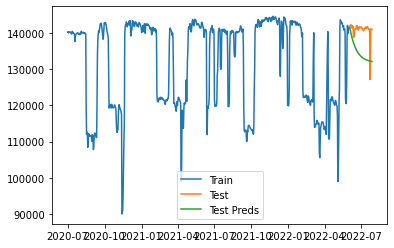

In [130]:
plt.plot(train_nuc, label = 'Train')
plt.plot(test_nuc, label = 'Test')
plt.plot(test_preds_nuc, label = 'Test Preds')
plt.legend();

In [131]:
# Fit the best fit model from grid search SARIMAX(0, 1, 1)x(0, 0, 0, 12)
seas_arima_nuc = ARIMA(train_nuc,
                   order=(1, 0, 1),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_nuc = seas_arima_nuc.fit()

# Print out summary information on the fit
print(res_sarima_nuc.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  702
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6758.146
Date:                Wed, 10 Aug 2022   AIC                          13524.293
Time:                        10:25:31   BIC                          13542.508
Sample:                    07-01-2020   HQIC                         13531.333
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+05   2899.317     45.441      0.000    1.26e+05    1.37e+05
ar.L1          0.9199      0.017     52.665      0.000       0.886       0.954
ma.L1          0.3305      0.032     10.326      0.0

### FBProphet Nuclear

In [132]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_nuc = Prophet(interval_width = 0.95)

In [133]:
train_nuc_pr = train_nuc.reset_index()
train_nuc_pr
# resetting the index for the train_gas dataframe

period   value
0   2020-07-01  140217
1   2020-07-02  140339
2   2020-07-03  139989
3   2020-07-04  140081
4   2020-07-05  140227
..         ...     ...
697 2022-05-29  139858
698 2022-05-30  140818
699 2022-05-31  141335
700 2022-06-01  141204
701 2022-06-02  141628

[702 rows x 2 columns]

In [134]:
train_nuc_pr = train_nuc_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

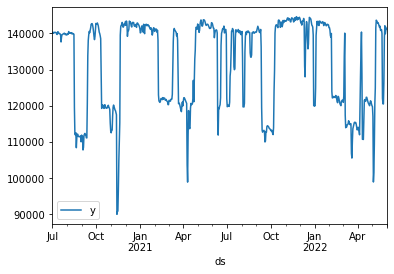

In [135]:
train_nuc_pr.plot(y = 'y', x = 'ds')

In [136]:
# Fit the timeseries to Model_'energy source'
Model_nuc.fit(train_nuc_pr)

10:25:31 - cmdstanpy - INFO - Chain [1] start processing
10:25:32 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_nuc = Model_nuc.make_future_dataframe(periods = 56, freq = 'D')

In [138]:
#Predict the future dates and values
results_nuc = Model_nuc.predict(df = future_nuc)

results_nuc.tail()

ds          trend    yhat_lower     yhat_upper    trend_lower  \
753 2022-07-24  119828.171210  97212.006360  142407.137380  119413.560026   
754 2022-07-25  119761.758564  96402.696362  143082.985049  119340.535136   
755 2022-07-26  119695.345917  97662.138363  143678.393929  119267.524548   
756 2022-07-27  119628.933271  97429.971263  142869.519433  119194.663416   
757 2022-07-28  119562.520624  97096.628615  142992.702602  119106.869818   

       trend_upper  additive_terms  additive_terms_lower  \
753  120234.476173     -312.560353           -312.560353   
754  120174.615543     -272.724705           -272.724705   
755  120117.715446       69.965556             69.965556   
756  120060.964965      132.000018            132.000018   
757  120004.214484       62.450276             62.450276   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
753           -312.560353 -312.560353   -312.560353   -312.560353   
754           -272.724705 -272.724705   -272.724705   -272.724705   
755             69.965556   69.965556     69.965556     69.965556   
756            132.000018  132.000018    132.000018    132.000018   
757             62.450276   62.450276     62.450276     62.450276   

     multiplicative_terms  multiplicative_terms_lower  \
753                   0.0                         0.0   
754                   0.0                         0.0   
755                   0.0                         0.0   
756                   0.0                         0.0   
757                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
753                         0.0  119515.610857  
754                         0.0  119489.033859  
755                         0.0  119765.311473  
756                         0.0  119760.933289  
757                         0.0  119624.970900

In [139]:
results_nuc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds           yhat     yhat_lower     yhat_upper
0   2020-07-01  130909.362585  108158.469061  153213.912094
1   2020-07-02  130839.290645  108341.226561  154159.446549
2   2020-07-03  130868.892866  107662.361733  154531.487438
3   2020-07-04  131004.090484  107294.999636  154287.673190
4   2020-07-05  130462.713420  107720.575957  154222.797135
..         ...            ...            ...            ...
753 2022-07-24  119515.610857   97212.006360  142407.137380
754 2022-07-25  119489.033859   96402.696362  143082.985049
755 2022-07-26  119765.311473   97662.138363  143678.393929
756 2022-07-27  119760.933289   97429.971263  142869.519433
757 2022-07-28  119624.970900   97096.628615  142992.702602

[758 rows x 4 columns]

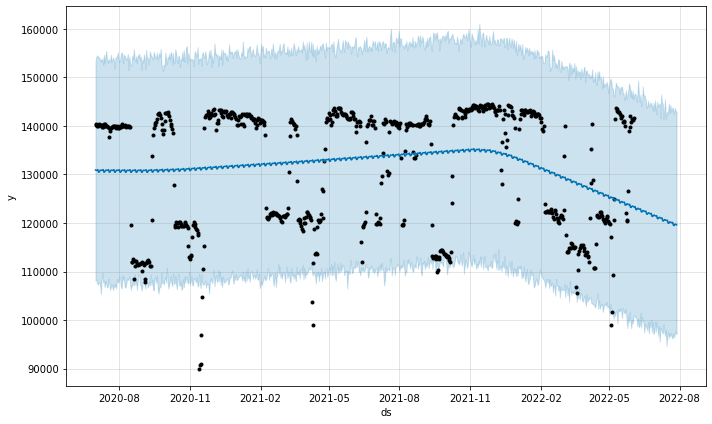

In [140]:
# plot the predictions
Model_nuc.plot(results_nuc);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

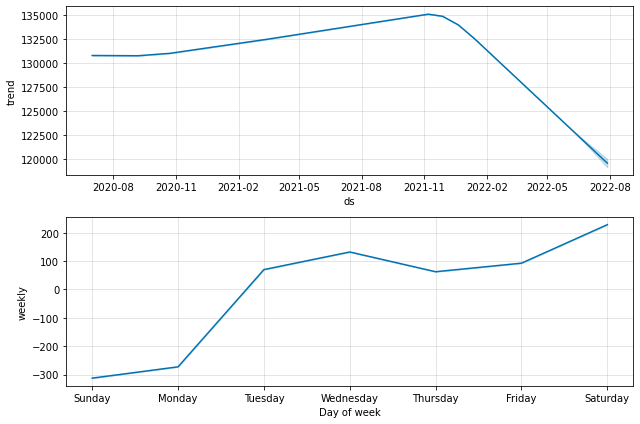

In [141]:
# Plot model components
Model_nuc.plot_components(results_nuc);

### Conclusion:
- PMDArima
    - The test predictions and the actually test data was off. The test data was higher than that of the predictions.
- FBProphet
    - The observed values follow a trend but is not comparable to that of  the forecasted values with some falling outside the uncertainty interval.

## Future Dates Nuclear
- Above we looked at how the models predicted existing data and learned from the past. 
- Below we will take the same process and apply it to future data to predict data we do not have. 

In [257]:
df_nuc_pr = df_nuc.reset_index()
df_nuc_pr.head(2)
# resetting the index for the df_gas dataframe and turning it back into a column for the labeling of ds and y.

period   value
0 2020-07-01  140217
1 2020-07-02  140339

In [258]:
df_nuc_pr = df_nuc_pr.rename(columns = {'period': 'ds', 'value': 'y'})
df_nuc_pr.head(2)
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

ds       y
0 2020-07-01  140217
1 2020-07-02  140339

In [259]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_df_nuc = Prophet(interval_width = 0.95)

Model_df_nuc.fit(df_nuc_pr)

13:24:28 - cmdstanpy - INFO - Chain [1] start processing
13:24:29 - cmdstanpy - INFO - Chain [1] done processing


In [260]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_df_nuc = Model_df_nuc.make_future_dataframe(periods = 56, freq = 'D')

In [261]:
#Predict the future dates and values
results_df_nuc = Model_df_nuc.predict(df = future_df_nuc)

results_df_nuc.tail(2)

ds          trend     yhat_lower     yhat_upper    trend_lower  \
812 2022-09-21  130823.382795  106346.866017  143707.508722  130631.280717   
813 2022-09-22  130815.236466  107722.246356  144352.275391  130616.451312   

       trend_upper  additive_terms  additive_terms_lower  \
812  131018.065017    -5600.806269          -5600.806269   
813  131016.484820    -5627.334745          -5627.334745   

     additive_terms_upper    weekly  weekly_lower  weekly_upper       yearly  \
812          -5600.806269  91.02663      91.02663      91.02663 -5691.832899   
813          -5627.334745   0.66821       0.66821       0.66821 -5628.002955   

     yearly_lower  yearly_upper  multiplicative_terms  \
812  -5691.832899  -5691.832899                   0.0   
813  -5628.002955  -5628.002955                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper           yhat  
812                         0.0                         0.0  125222.576526  
813                         0.0                         0.0  125187.901721

In [263]:
results_df_nuc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds           yhat     yhat_lower     yhat_upper
0 2020-07-01  135195.199562  117437.574726  152908.083439
1 2020-07-02  135179.937744  117801.965204  153487.715672
2 2020-07-03  135423.334029  118275.088577  153610.854712

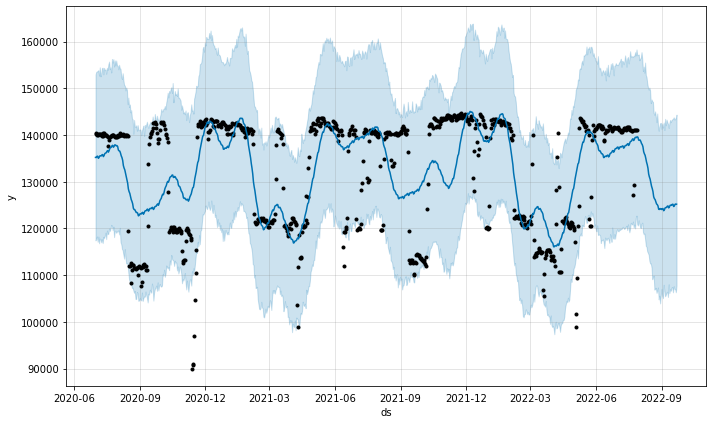

In [264]:
# plot the predictions
Model_df_nuc.plot(results_df_nuc);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

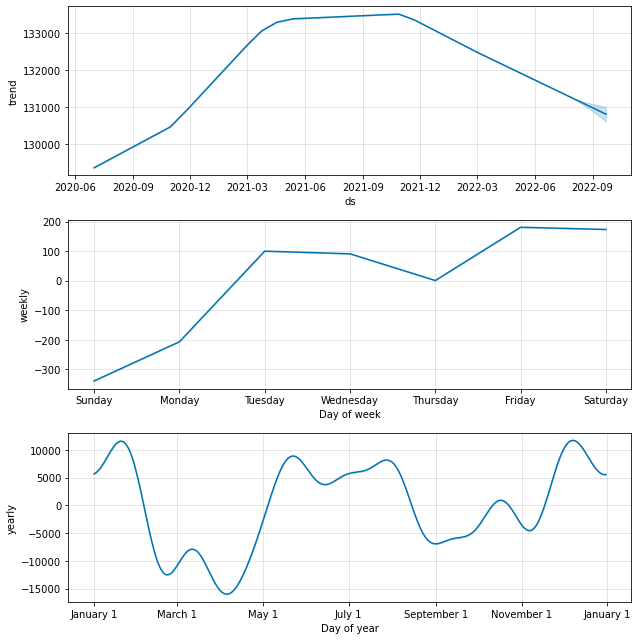

In [265]:
# Plot model components
Model_df_nuc.plot_components(results_df_nuc);

### Conclusion:
- The Prediction Plot follows a clear prediciton and can be used to better predict future gas production.
- Majority of the observed values fall within the uncertainty interval or follows the trend.

### PMDArima Other

In [142]:
adf_test_oth = ADFTest()

adf_test_oth = ADFTest(alpha=0.05)
p_val_oth, should_diff_oth = adf_test_oth.should_diff(df_oth) 

print(f"P-Value: {p_val_oth}, so should you difference the data? {should_diff_oth}")

P-Value: 0.01, so should you difference the data? False


In [143]:
arima_oth = auto_arima(train_oth,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=11146.311, Time=3.87 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12004.479, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=11143.522, Time=0.97 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=11520.041, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=14515.263, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=11144.002, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=11145.463, Time=3.88 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=11145.474, Time=1.51 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=11143.546, Time=0.41 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=11147.299, Time=4.31 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=12005.889, Time=0.30 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=11145.134, Time=1.01 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=11145.151, Time=1.34 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=11533.653, Time=1.33 sec
 ARIM

In [144]:
arima_oth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  702
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -5567.761
Date:                            Wed, 10 Aug 2022   AIC                          11143.522
Time:                                    10:26:00   BIC                          11161.737
Sample:                                         0   HQIC                         11150.562
                                            - 702                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1108.0748     98.684     11.228      0.000     914.657    1301.492
ar.L1          0.8393      0.014     58.060      0.000       0.811       0.868
ar.S.L12       0.0603      0.041      1.486      0.137      -0.019       0.140
sigma2       4.55e+05   1.15e+04     39.561      0.000    4.32e+05    4.78e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              3004.32
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                            -1.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
test_preds_oth = pd.Series(arima_oth.predict(n_periods=len(test_oth)), index=test_oth.index)

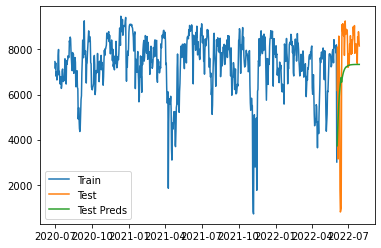

In [146]:
plt.plot(train_oth, label = 'Train')
plt.plot(test_oth, label = 'Test')
plt.plot(test_preds_oth, label = 'Test Preds')
plt.legend();

In [147]:
# Fit the best fit model from grid search SARIMAX(1, 0, 0)x(0, 0, 0, 12)
seas_arima_oth = ARIMA(train_oth,
                   order=(1, 0, 0),
                   seasonal_order=(1, 0, 0, 12))
res_sarima_oth = seas_arima_oth.fit()

# Print out summary information on the fit
print(res_sarima_oth.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            value   No. Observations:                  702
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -5567.736
Date:                          Wed, 10 Aug 2022   AIC                          11143.473
Time:                                  10:26:01   BIC                          11161.688
Sample:                              07-01-2020   HQIC                         11150.513
                                   - 06-02-2022                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7361.3604    216.727     33.966      0.000    6936.582    7786.138
ar.L1          0.8450      0.014     58.533      0.

### FBProphet Other

In [148]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_oth = Prophet(interval_width = 0.95)

In [149]:
train_oth_pr = train_oth.reset_index()
train_oth_pr
# resetting the index for the train_gas dataframe

period  value
0   2020-07-01   7461
1   2020-07-02   7153
2   2020-07-03   7402
3   2020-07-04   6813
4   2020-07-05   7017
..         ...    ...
697 2022-05-29   8170
698 2022-05-30   8166
699 2022-05-31   7853
700 2022-06-01   8204
701 2022-06-02   3008

[702 rows x 2 columns]

In [150]:
train_oth_pr = train_oth_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

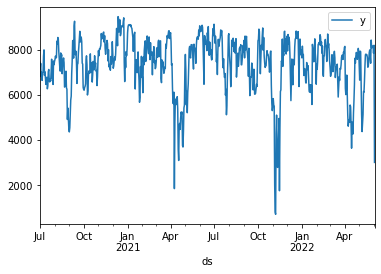

In [151]:
train_oth_pr.plot(y = 'y', x = 'ds')

In [152]:
# Fit the timeseries to Model_'energy source'
Model_oth.fit(train_oth_pr)

10:26:02 - cmdstanpy - INFO - Chain [1] start processing
10:26:03 - cmdstanpy - INFO - Chain [1] done processing


In [153]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_oth = Model_oth.make_future_dataframe(periods = 56, freq = 'D')

In [154]:
#Predict the future dates and values
results_oth = Model_oth.predict(df = future_oth)

results_oth.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
753 2022-07-24  6949.262820  4429.259608  9350.819773  6938.085993   
754 2022-07-25  6948.012840  4392.269066  9127.042864  6936.474197   
755 2022-07-26  6946.762861  4625.626825  9437.838873  6934.862401   
756 2022-07-27  6945.512882  4661.510306  9436.163664  6933.250605   
757 2022-07-28  6944.262902  4796.905593  9377.196949  6931.638808   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
753  6960.494447       65.468436             65.468436             65.468436   
754  6959.563793      -59.305216            -59.305216            -59.305216   
755  6958.631562        2.891200              2.891200              2.891200   
756  6957.755129      -10.113487            -10.113487            -10.113487   
757  6956.800092       -2.946262             -2.946262             -2.946262   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
753  65.468436     65.468436     65.468436                   0.0   
754 -59.305216    -59.305216    -59.305216                   0.0   
755   2.891200      2.891200      2.891200                   0.0   
756 -10.113487    -10.113487    -10.113487                   0.0   
757  -2.946262     -2.946262     -2.946262                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
753                         0.0                         0.0  7014.731256  
754                         0.0                         0.0  6888.707624  
755                         0.0                         0.0  6949.654061  
756                         0.0                         0.0  6935.399394  
757                         0.0                         0.0  6941.316640

In [155]:
results_oth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds         yhat   yhat_lower    yhat_upper
0   2020-07-01  7349.697095  4966.831920   9496.300170
1   2020-07-02  7358.098028  4861.416224   9763.007071
2   2020-07-03  7348.846243  5106.441572   9775.380060
3   2020-07-04  7380.948791  4932.498720   9616.253506
4   2020-07-05  7430.213851  5058.212098  10117.192455
..         ...          ...          ...           ...
753 2022-07-24  7014.731256  4429.259608   9350.819773
754 2022-07-25  6888.707624  4392.269066   9127.042864
755 2022-07-26  6949.654061  4625.626825   9437.838873
756 2022-07-27  6935.399394  4661.510306   9436.163664
757 2022-07-28  6941.316640  4796.905593   9377.196949

[758 rows x 4 columns]

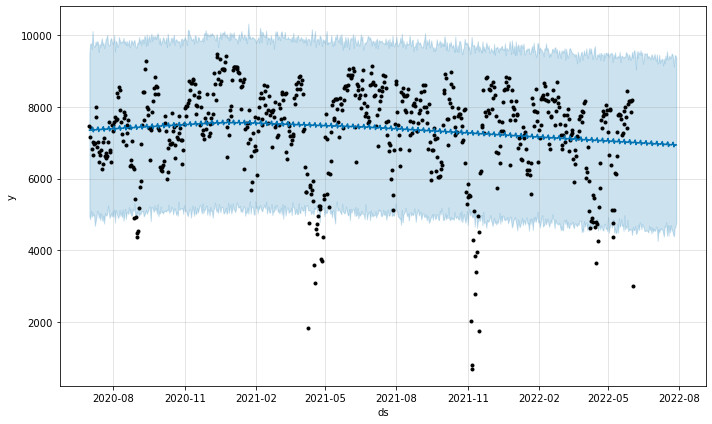

In [156]:
# plot the predictions
Model_oth.plot(results_oth);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

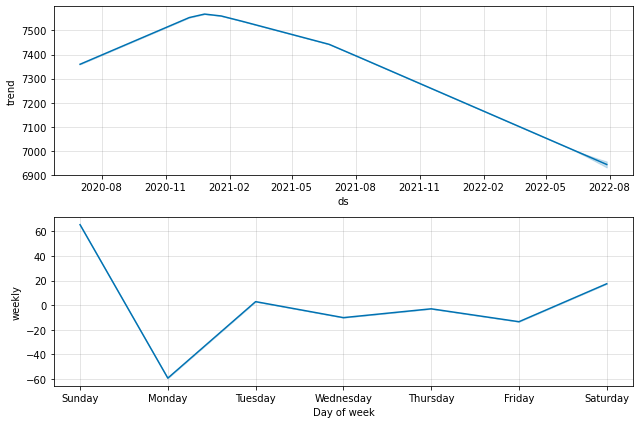

In [157]:
# Plot model components
Model_oth.plot_components(results_oth);

### Conclusion:
- PMDArima
    - The test predictions and the actually test data was off. The test data was higher than that of the predictions.
- FBProphet
    - The observed values follow a trend but is not comparable to that of  the forecasted values with some falling outside the uncertainty interval.

## Future Dates Other
- Above we looked at how the models predicted existing data and learned from the past. 
- Below we will take the same process and apply it to future data to predict data we do not have. 

In [266]:
df_oth_pr = df_oth.reset_index()
df_oth_pr.head(2)
# resetting the index for the df_gas dataframe and turning it back into a column for the labeling of ds and y.

period  value
0 2020-07-01   7461
1 2020-07-02   7153

In [267]:
df_oth_pr = df_oth_pr.rename(columns = {'period': 'ds', 'value': 'y'})
df_oth_pr.head(2)
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

ds     y
0 2020-07-01  7461
1 2020-07-02  7153

In [268]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_df_oth = Prophet(interval_width = 0.95)

Model_df_oth.fit(df_oth_pr)

13:28:58 - cmdstanpy - INFO - Chain [1] start processing
13:29:00 - cmdstanpy - INFO - Chain [1] done processing


In [269]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_df_oth = Model_df_oth.make_future_dataframe(periods = 56, freq = 'D')

In [270]:
#Predict the future dates and values
results_df_oth = Model_df_oth.predict(df = future_df_oth)

results_df_oth.tail(2)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
812 2022-09-21  7243.136307  5279.517982  9557.530524   7206.66224   
813 2022-09-22  7243.059642  5348.432612  9447.061529   7205.56415   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
812  7278.031495      174.643318            174.643318            174.643318   
813  7279.150439      140.308797            140.308797            140.308797   

        weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
812  47.880071     47.880071     47.880071  126.763247    126.763247   
813  33.514086     33.514086     33.514086  106.794711    106.794711   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
812    126.763247                   0.0                         0.0   
813    106.794711                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
812                         0.0  7417.779626  
813                         0.0  7383.368438

In [271]:
results_df_oth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds         yhat   yhat_lower    yhat_upper
0 2020-07-01  8009.595313  5848.856417  10111.423927
1 2020-07-02  7998.248586  5964.978411  10104.481604
2 2020-07-03  7916.877152  6014.826119  10040.505823

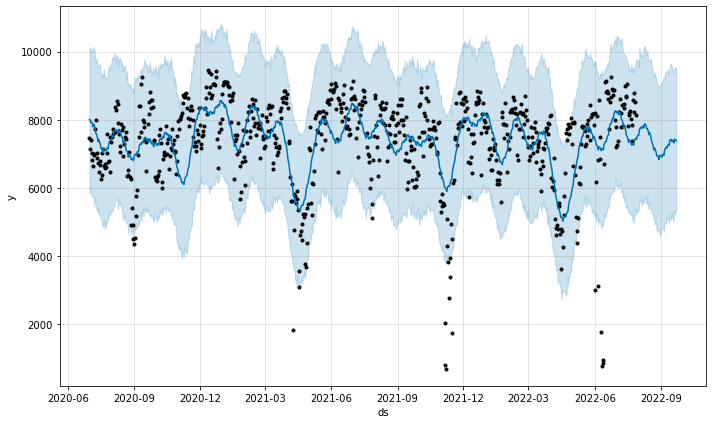

In [272]:
# plot the predictions
Model_df_oth.plot(results_df_oth);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

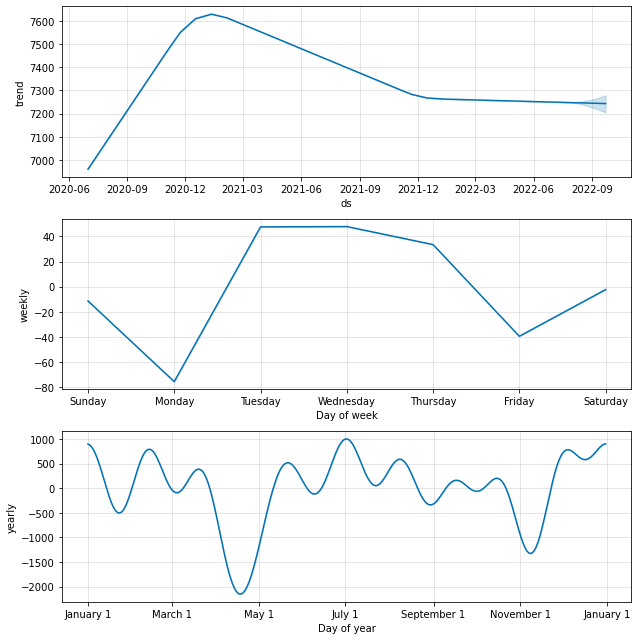

In [273]:
# Plot model components
Model_df_oth.plot_components(results_df_oth);

### Conclusion:
- The Prediction Plot follows a clear prediciton and can be used to better predict future gas production.
- Majority of the observed values fall within the uncertainty interval or follows the trend.

### PMDArima Demand

In [158]:
adf_test_dem = ADFTest()

adf_test_dem = ADFTest(alpha=0.05)
p_val_dem, should_diff_dem = adf_test_dem.should_diff(df_dem) 

print(f"P-Value: {p_val_dem}, so should you difference the data? {should_diff_dem}")

P-Value: 0.01, so should you difference the data? False


In [159]:
arima_dem = auto_arima(train_dem,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=16841.858, Time=4.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=18007.387, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=16916.376, Time=1.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=17506.627, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=20784.318, Time=0.02 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=16840.138, Time=0.77 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=16846.995, Time=0.24 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=16841.728, Time=2.44 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=16839.880, Time=2.00 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=16840.161, Time=5.86 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=16841.245, Time=12.04 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=17416.559, Time=1.49 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=16864.526, Time=1.78 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=16831.578, Time=5.24 sec
 ARI

In [160]:
arima_dem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  702
Model:             SARIMAX(1, 0, 3)x(2, 0, [1], 12)   Log Likelihood               -8392.994
Date:                              Wed, 10 Aug 2022   AIC                          16803.987
Time:                                      10:29:41   BIC                          16844.973
Sample:                                           0   HQIC                         16819.828
                                              - 702                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.527e+04   1.85e+04      2.446      0.014    8996.335    8.15e+04
ar.L1          0.9677      0.013     75.437      0.000       0.943       0.993
ma.L1          0.1315      0.037      3.573      0.000       0.059       0.204
ma.L2         -0.3933      0.039    -10.012      0.000      -0.470      -0.316
ma.L3         -0.2544      0.037     -6.929      0.000      -0.326      -0.182
ar.S.L12      -0.9858      0.159     -6.185      0.000      -1.298      -0.673
ar.S.L24      -0.1383      0.037     -3.743      0.000      -0.211      -0.066
ma.S.L12       0.8662      0.164      5.267      0.000       0.544       1.189
sigma2        1.5e+09      0.323   4.64e+09      0.000     1.5e+09     1.5e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                69.97
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.42
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.47e+25. Standard errors may be unstable.
"""

In [161]:
test_preds_dem = pd.Series(arima_dem.predict(n_periods=len(test_dem)), index=test_dem.index)

In [162]:
test_dem.index[-1] 

Timestamp('2022-07-28 00:00:00', freq='D')

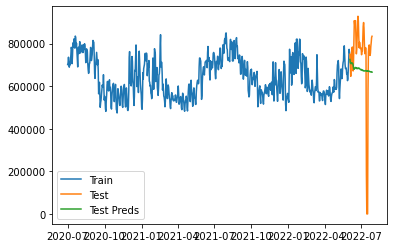

In [163]:
plt.plot(train_dem, label = 'Train')
plt.plot(test_dem, label = 'Test')
plt.plot(test_preds_dem, label = 'Test Preds')
plt.legend();

In [164]:
# Fit the best fit model from grid search SARIMAX(0, 1, 3)x(0, 0, 1, 12)
seas_arima_dem = ARIMA(train_dem,
                   order=(1, 1, 2),
                   seasonal_order=(0, 0, 1, 12))
res_sarima_dem = seas_arima_dem.fit()

# Print out summary information on the fit
print(res_sarima_dem.summary())

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  702
Model:             ARIMA(1, 1, 2)x(0, 0, [1], 12)   Log Likelihood               -8415.080
Date:                            Wed, 10 Aug 2022   AIC                          16840.160
Time:                                    10:29:43   BIC                          16862.922
Sample:                                07-01-2020   HQIC                         16848.958
                                     - 06-02-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5077      0.042     12.054      0.000       0.425       0.590
ma.L1         -0.4374      0.041   

In [165]:
pd.date_range("2022-07-29", periods=len(test_dem), freq='D')

DatetimeIndex(['2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01',
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09',
               '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13',
               '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
               '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18',
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22'],
     

### FBProphet Demand

In [166]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [167]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_dem = Prophet(interval_width = 0.95)

In [168]:
train_dem_pr = train_dem.reset_index()
train_dem_pr
# resetting the index for the train_gas dataframe

period   value
0   2020-07-01  701703
1   2020-07-02  709342
2   2020-07-03  736199
3   2020-07-04  713140
4   2020-07-05  689472
..         ...     ...
697 2022-05-29  635584
698 2022-05-30  684677
699 2022-05-31  727593
700 2022-06-01  773271
701 2022-06-02  757933

[702 rows x 2 columns]

In [169]:
train_dem_pr = train_dem_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

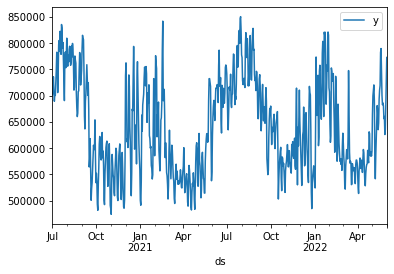

In [170]:
train_dem_pr.plot(y = 'y', x = 'ds');

In [171]:
# Fit the timeseries to Model_'energy source'
Model_dem.fit(train_dem_pr)

10:29:43 - cmdstanpy - INFO - Chain [1] start processing
10:29:45 - cmdstanpy - INFO - Chain [1] done processing


In [172]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_dem = Model_dem.make_future_dataframe(periods = 56, freq = 'D')

In [173]:
#Predict the future dates and values
results_dem = Model_dem.predict(df = future_dem)

results_dem.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
753 2022-07-24  609435.372157  427991.789432  712962.874444  587710.887493   
754 2022-07-25  609296.563357  468656.562311  758771.436231  587187.249462   
755 2022-07-26  609157.754558  488033.883299  766497.637652  586537.576570   
756 2022-07-27  609018.945758  482417.970539  776330.545968  585764.218784   
757 2022-07-28  608880.136959  477731.290278  770568.681513  585136.138344   

       trend_upper  additive_terms  additive_terms_lower  \
753  628678.945048   -33775.619451         -33775.619451   
754  629172.519025      383.060975            383.060975   
755  629620.044032    19934.816935          19934.816935   
756  630076.921948    16407.489158          16407.489158   
757  630529.703539    10425.842731          10425.842731   

     additive_terms_upper        weekly  weekly_lower  weekly_upper  \
753         -33775.619451 -33775.619451 -33775.619451 -33775.619451   
754            383.060975    383.060975    383.060975    383.060975   
755          19934.816935  19934.816935  19934.816935  19934.816935   
756          16407.489158  16407.489158  16407.489158  16407.489158   
757          10425.842731  10425.842731  10425.842731  10425.842731   

     multiplicative_terms  multiplicative_terms_lower  \
753                   0.0                         0.0   
754                   0.0                         0.0   
755                   0.0                         0.0   
756                   0.0                         0.0   
757                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
753                         0.0  575659.752706  
754                         0.0  609679.624332  
755                         0.0  629092.571493  
756                         0.0  625426.434917  
757                         0.0  619305.979690

In [174]:
results_dem[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds           yhat     yhat_lower     yhat_upper
0   2020-07-01  783150.464253  643535.904042  926789.933670
1   2020-07-02  775828.543617  639825.107532  923142.086227
2   2020-07-03  768723.156899  619522.435281  918224.997902
3   2020-07-04  744685.831894  598180.309694  884634.045671
4   2020-07-05  727606.258806  577131.560782  879595.101473
..         ...            ...            ...            ...
753 2022-07-24  575659.752706  427991.789432  712962.874444
754 2022-07-25  609679.624332  468656.562311  758771.436231
755 2022-07-26  629092.571493  488033.883299  766497.637652
756 2022-07-27  625426.434917  482417.970539  776330.545968
757 2022-07-28  619305.979690  477731.290278  770568.681513

[758 rows x 4 columns]

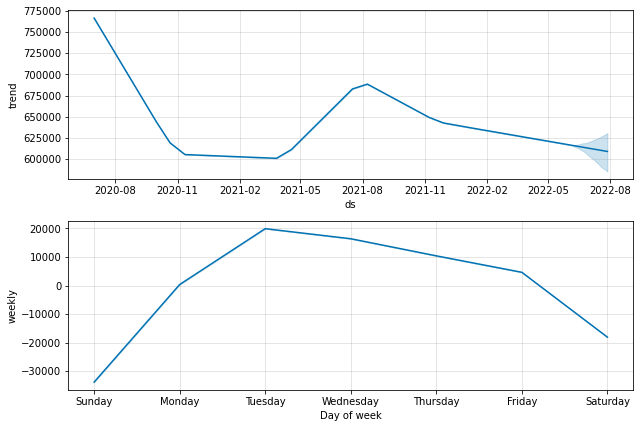

In [175]:
# Plot model components
Model_dem.plot_components(results_dem);

### Conclusion:
- PMDArima
    - The test predictions and the actually test data was off. The test data was higher than that of the predictions.
- FBProphet
    - The observed values follow a trend but is not comparable to that of  the forecasted values with some falling outside the uncertainty interval.

## Future Dates Demand
- Above we looked at how the models predicted existing data and learned from the past. 
- Below we will take the same process and apply it to future data to predict data we do not have. 

In [274]:
df_dem_pr = df_dem.reset_index()
df_dem_pr.head(2)
# resetting the index for the df_gas dataframe and turning it back into a column for the labeling of ds and y.

period  tot_dem
0 2020-07-01   701703
1 2020-07-02   709342

In [277]:
df_dem_pr = df_dem_pr.rename(columns = {'period': 'ds', 'tot_dem': 'y'})
df_dem_pr.head(2)
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

ds       y
0 2020-07-01  701703
1 2020-07-02  709342

In [278]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_df_dem = Prophet(interval_width = 0.95)

Model_df_dem.fit(df_dem_pr)

13:33:09 - cmdstanpy - INFO - Chain [1] start processing
13:33:10 - cmdstanpy - INFO - Chain [1] done processing


In [279]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_df_dem = Model_df_dem.make_future_dataframe(periods = 56, freq = 'D')

In [280]:
#Predict the future dates and values
results_df_dem = Model_df_dem.predict(df = future_df_dem)

results_df_dem.tail(2)

ds          trend     yhat_lower     yhat_upper    trend_lower  \
812 2022-09-21  675866.290087  526968.099216  811552.627590  675011.034367   
813 2022-09-22  675950.050699  524118.196737  805937.779632  675069.275726   

       trend_upper  additive_terms  additive_terms_lower  \
812  676653.967697     1118.840947           1118.840947   
813  676749.497056   -14755.201964         -14755.201964   

     additive_terms_upper        weekly  weekly_lower  weekly_upper  \
812           1118.840947  21164.170626  21164.170626  21164.170626   
813         -14755.201964  10995.477751  10995.477751  10995.477751   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
812 -20045.329679 -20045.329679 -20045.329679                   0.0   
813 -25750.679715 -25750.679715 -25750.679715                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper           yhat  
812                         0.0                         0.0  676985.131034  
813                         0.0                         0.0  661194.848736

In [281]:
results_df_dem[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds           yhat     yhat_lower     yhat_upper
0 2020-07-01  755685.580726  622811.356139  891722.881471
1 2020-07-02  738739.754458  597700.714646  884510.741392
2 2020-07-03  723940.417530  585063.694716  861110.325847

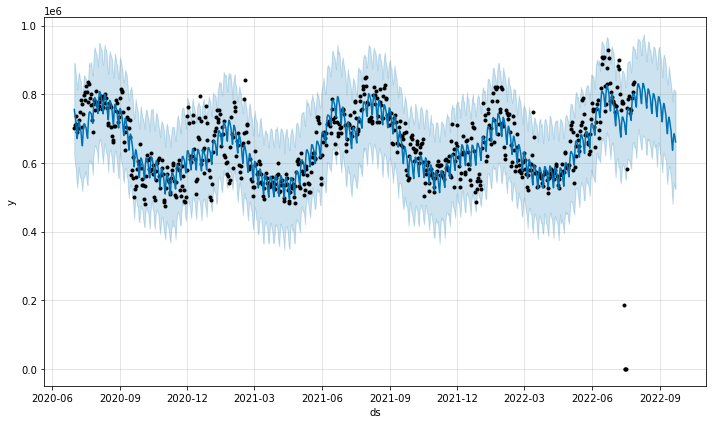

In [282]:
# plot the predictions
Model_df_dem.plot(results_df_dem);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

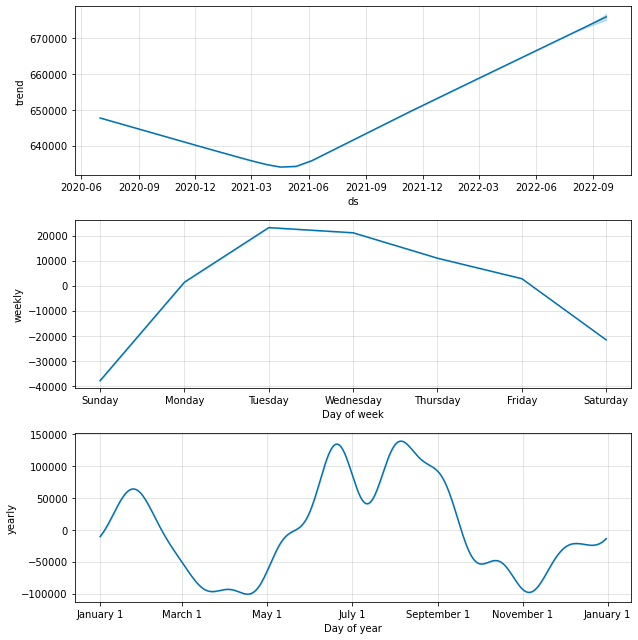

In [283]:
# Plot model components
Model_df_dem.plot_components(results_df_dem);

### Conclusion:
- The Prediction Plot follows a clear prediciton and can be used to better predict future gas production.
- Majority of the observed values fall within the uncertainty interval or follows the trend.

### PMDArima Total Production

In [176]:
df_tot_prod = (df_oil['value'] + df_col['value'] + df_sun['value'] + df_gas['value'] + df_hydro['value'] + df_nuc['value'] + df_wind['value'] + df_oth['value'])
df_tot_prod.head()

period
2020-07-01    722281
2020-07-02    728758
2020-07-03    744822
2020-07-04    732257
2020-07-05    716619
Freq: D, Name: value, dtype: int64

In [177]:
adf_test_tot_prod = ADFTest()

adf_test_tot_prod = ADFTest(alpha=0.05)
p_val_tot_prod, should_diff_tot_prod = adf_test_tot_prod.should_diff(df_tot_prod) 

print(f"P-Value: {p_val_tot_prod}, so should you difference the data? {should_diff_tot_prod}")

P-Value: 0.13137269714867092, so should you difference the data? True


In [178]:
arima_tot_prod = auto_arima(df_tot_prod,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=18129.050, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=18256.085, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=18218.244, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=18199.747, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=18254.096, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=18129.016, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=18137.902, Time=0.32 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=18128.577, Time=2.96 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=18130.689, Time=3.44 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=18160.880, Time=1.48 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=18184.891, Time=2.35 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=18129.437, Time=4.39 sec
 ARIMA(1,1,3)(0,0,2)[12] intercept   : AIC=18127.951, Time=3.44 sec
 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=18128.008, Time=1.64 sec
 ARIM

In [179]:
arima_tot_prod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  758
Model:             SARIMAX(2, 1, 4)x(1, 0, [], 12)   Log Likelihood               -9040.647
Date:                             Wed, 10 Aug 2022   AIC                          18097.294
Time:                                     10:34:37   BIC                          18134.329
Sample:                                          0   HQIC                         18111.558
                                             - 758                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2389      0.006    191.366      0.000       1.226       1.252
ar.L2         -0.9895      0.006   -158.534      0.000      -1.002      -0.977
ma.L1         -1.1306      0.028    -39.975      0.000      -1.186      -1.075
ma.L2          0.6265      0.033     18.952      0.000       0.562       0.691
ma.L3          0.3651      0.030     12.105      0.000       0.306       0.424
ma.L4         -0.2137      0.017    -12.401      0.000      -0.247      -0.180
ar.S.L12      -0.1019      0.017     -5.849      0.000      -0.136      -0.068
sigma2      1.377e+09   5.58e-12   2.47e+20      0.000    1.38e+09    1.38e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.59   Jarque-Bera (JB):               135.56
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.34
Prob(H) (two-sided):                  0.85   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.74e+36. Standard errors may be unstable.
"""

In [180]:
test_preds_tot_prod = pd.Series(arima_tot_prod.predict(n_periods=len(df_tot_prod)), index=df_tot_prod.index)

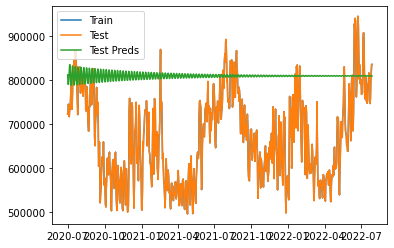

In [181]:
plt.plot(df_tot_prod, label = 'Train')
plt.plot(df_tot_prod, label = 'Test')
plt.plot(test_preds_tot_prod, label = 'Test Preds')
plt.legend();

In [182]:
# Fit the best fit model from grid search SARIMAX(2, 1, 4)x(1, 0, 0, 12)
seas_arima_tot_prod = ARIMA(df_tot_prod,
                   order=(2, 1, 4),
                   seasonal_order=(1, 0, 0, 12))
res_sarima_tot_prod = seas_arima_tot_prod.fit()

# Print out summary information on the fit
print(res_sarima_tot_prod.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  758
Model:             ARIMA(2, 1, 4)x(1, 0, [], 12)   Log Likelihood               -9040.647
Date:                           Wed, 10 Aug 2022   AIC                          18097.294
Time:                                   10:34:44   BIC                          18134.329
Sample:                               07-01-2020   HQIC                         18111.558
                                    - 07-28-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2389      0.006    191.366      0.000       1.226       1.252
ar.L2         -0.9895      0.006   -158.534

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### FBProphet Total Production

In [183]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_tot_prod = Prophet(interval_width = 0.95)

In [184]:
train_tot_prod = df_tot_prod.reset_index()
train_tot_prod
# resetting the index for the train_gas dataframe

period   value
0   2020-07-01  722281
1   2020-07-02  728758
2   2020-07-03  744822
3   2020-07-04  732257
4   2020-07-05  716619
..         ...     ...
753 2022-07-24  757228
754 2022-07-25  804181
755 2022-07-26  814560
756 2022-07-27  834830
757 2022-07-28  835221

[758 rows x 2 columns]

In [185]:
 train_tot_prod = train_tot_prod.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

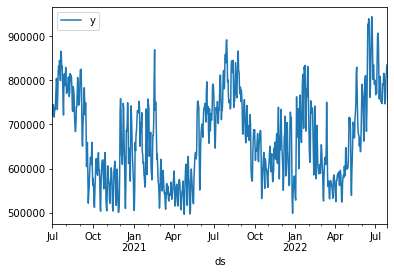

In [186]:
train_tot_prod.plot(y = 'y', x = 'ds');

In [187]:
# Fit the timeseries to Model_'energy source'
Model_tot_prod.fit(train_tot_prod)

10:34:44 - cmdstanpy - INFO - Chain [1] start processing
10:34:46 - cmdstanpy - INFO - Chain [1] done processing


In [188]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_tot_prod = Model_tot_prod.make_future_dataframe(periods = 56, freq = 'D')

In [189]:
#Predict the future dates and values
results_tot_prod = Model_tot_prod.predict(df = future_tot_prod)

results_tot_prod

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2020-07-01  649154.247908  668362.896483  864420.954219  649154.247908   
1   2020-07-02  649149.207899  654818.028880  859312.902228  649149.207899   
2   2020-07-03  649144.167890  646053.727379  841554.885602  649144.167890   
3   2020-07-04  649139.127881  622774.361516  823233.028370  649139.127881   
4   2020-07-05  649134.087872  611905.561234  794446.326817  649134.087872   
..         ...            ...            ...            ...            ...   
809 2022-09-18  717794.662390  589819.211930  779744.058766  716958.821430   
810 2022-09-19  717944.480163  624215.449460  809360.144793  717088.748696   
811 2022-09-20  718094.297937  630056.441192  823320.703348  717221.365765   
812 2022-09-21  718244.115710  623826.841569  815454.677514  717355.117937   
813 2022-09-22  718393.933483  615370.737016  812566.386065  717488.295477   

       trend_upper  additive_terms  additive_terms_lower  \
0    649154.247908   111211.443054         111211.443054   
1    649149.207899   104540.626860         104540.626860   
2    649144.167890    97171.942017          97171.942017   
3    649139.127881    70781.698390          70781.698390   
4    649134.087872    53784.440078          53784.440078   
..             ...             ...                   ...   
809  718551.113440   -32800.441886         -32800.441886   
810  718735.990020    -3337.102447          -3337.102447   
811  718903.778700    10317.132132          10317.132132   
812  719071.250151     2755.215684           2755.215684   
813  719238.714524    -7533.145661          -7533.145661   

     additive_terms_upper        weekly  weekly_lower  weekly_upper  \
0           111211.443054  17486.059820  17486.059820  17486.059820   
1           104540.626860  12365.406017  12365.406017  12365.406017   
2            97171.942017   6205.172065   6205.172065   6205.172065   
3            70781.698390 -19366.418715 -19366.418715 -19366.418715   
4            53784.440078 -35972.376616 -35972.376616 -35972.376616   
..                    ...           ...           ...           ...   
809         -32800.441886 -35972.376616 -35972.376616 -35972.376616   
810          -3337.102447   -176.245786   -176.245786   -176.245786   
811          10317.132132  19458.403215  19458.403215  19458.403215   
812           2755.215684  17486.059820  17486.059820  17486.059820   
813          -7533.145661  12365.406017  12365.406017  12365.406017   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    93725.383234  93725.383234  93725.383234                   0.0   
1    92175.220843  92175.220843  92175.220843                   0.0   
2    90966.769952  90966.769952  90966.769952                   0.0   
3    90148.117105  90148.117105  90148.117105                   0.0   
4    89756.816695  89756.816695  89756.816695                   0.0   
..            ...           ...           ...                   ...   
809   3171.934731   3171.934731   3171.934731                   0.0   
810  -3160.856661  -3160.856661  -3160.856661                   0.0   
811  -9141.271083  -9141.271083  -9141.271083                   0.0   
812 -14730.844137 -14730.844137 -14730.844137                   0.0   
813 -19898.551678 -19898.551678 -19898.551678                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                           0.0                         0.0  760365.690962  
1                           0.0                         0.0  753689.834759  
2                           0.0                         0.0  746316.109907  
3                           0.0                         0.0  719920.826271  
4                           0.0                         0.0  702918.527950  
..                          ...                         ...            ...  
809                         0.0                         0.0  684994.220504  
810                         0.0 

In [190]:
results_tot_prod[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds           yhat     yhat_lower     yhat_upper
0   2020-07-01  760365.690962  668362.896483  864420.954219
1   2020-07-02  753689.834759  654818.028880  859312.902228
2   2020-07-03  746316.109907  646053.727379  841554.885602
3   2020-07-04  719920.826271  622774.361516  823233.028370
4   2020-07-05  702918.527950  611905.561234  794446.326817
..         ...            ...            ...            ...
809 2022-09-18  684994.220504  589819.211930  779744.058766
810 2022-09-19  714607.377716  624215.449460  809360.144793
811 2022-09-20  728411.430068  630056.441192  823320.703348
812 2022-09-21  720999.331394  623826.841569  815454.677514
813 2022-09-22  710860.787822  615370.737016  812566.386065

[814 rows x 4 columns]

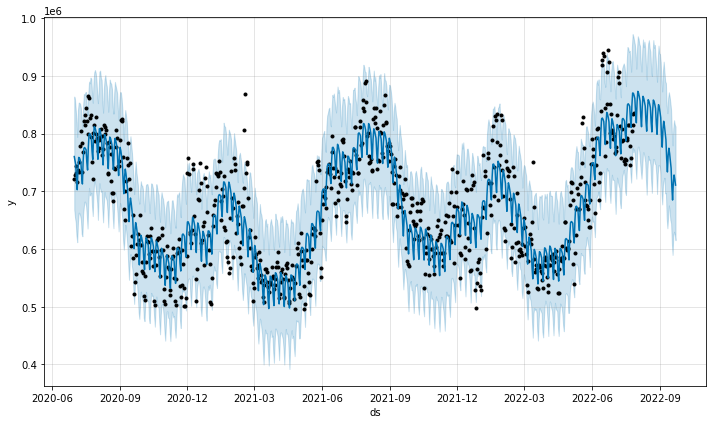

In [284]:
# plot the predictions
Model_tot_prod.plot(results_tot_prod);

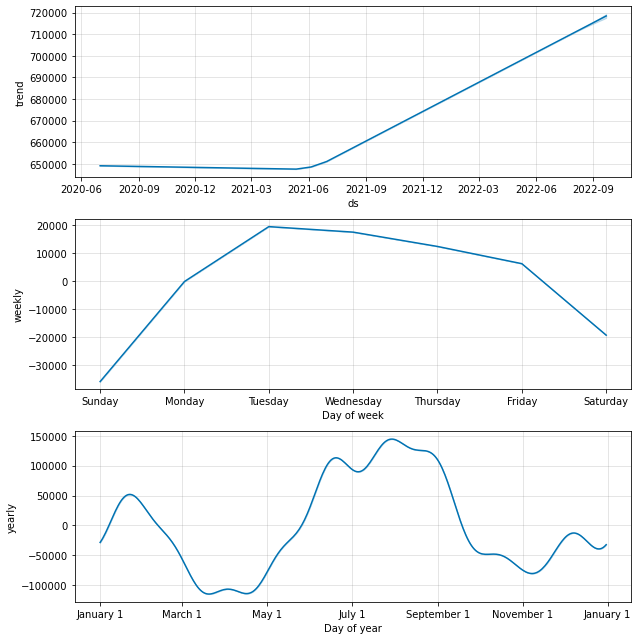

In [191]:
# Plot model components
Model_tot_prod.plot_components(results_tot_prod);

### Conclusion:
- PMDArima
    - The test predictions and the actually test data was off. The test data was higher than that of the predictions.
- FBProphet
    - The observed values follow a trend but is not comparable to that of  the forecasted values with some falling outside the uncertainty interval.

### PMDArima Difference Between Production and Demand

In [197]:
train_diff, test_diff = train_test_split(df_comb_diff, test_size = 56, shuffle=False)

In [198]:
# Checking stationarity
adf_test_diff = ADFTest()

adf_test_diff = ADFTest(alpha=0.05)
p_val_diff, should_diff_diff = adf_test_diff.should_diff(df_comb_diff) 

print(f"P-Value: {p_val_diff}, so should you difference the data? {should_diff_diff}")

P-Value: 0.01, so should you difference the data? False


In [199]:
arima_diff = auto_arima(train_diff,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=14554.955, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=14641.573, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=14643.244, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=14642.563, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=14639.574, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=14562.169, Time=0.82 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=14561.103, Time=0.89 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=14554.267, Time=4.58 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=14553.498, Time=2.43 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=14565.128, Time=1.22 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=14567.140, Time=5.08 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=14553.803, Time=4.42 sec
 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=14545.605, Time=8.59 sec
 ARIMA(1,1,3)(1,0,0)[12] intercept   : AIC=14556.328, Time=3.43 sec
 ARIM

In [200]:
arima_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  702
Model:             SARIMAX(1, 1, 3)x(2, 0, [], 12)   Log Likelihood               -7264.844
Date:                             Wed, 10 Aug 2022   AIC                          14543.687
Time:                                     10:36:50   BIC                          14575.555
Sample:                                          0   HQIC                         14556.005
                                             - 702                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8533      0.045     18.988      0.000       0.765       0.941
ma.L1         -0.9942      0.059    -16.847      0.000      -1.110      -0.879
ma.L2         -0.2047      0.054     -3.775      0.000      -0.311      -0.098
ma.L3          0.2146      0.051      4.245      0.000       0.116       0.314
ar.S.L12      -0.0519      0.039     -1.319      0.187      -0.129       0.025
ar.S.L24       0.1417      0.035      4.039      0.000       0.073       0.210
sigma2      6.156e+07    1.5e-10   4.09e+17      0.000    6.16e+07    6.16e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                98.42
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.37
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+33. Standard errors may be unstable.
"""

In [201]:
test_preds_diff = pd.Series(arima_diff.predict(n_periods=len(test_diff)), index=test_diff.index)

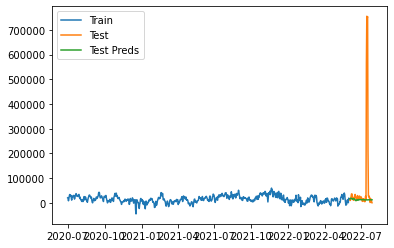

In [202]:
plt.plot(train_diff, label = 'Train')
plt.plot(test_diff, label = 'Test')
plt.plot(test_preds_diff, label = 'Test Preds')
plt.legend();

In [203]:
# Fit the best fit model from grid search SARIMAX(0, 1, 3)x(2, 0, 0, 12)
seas_arima_diff = ARIMA(train_diff,
                   order=(0, 1, 3),
                   seasonal_order=(2, 0, 0, 12))
res_sarima_diff = seas_arima_diff.fit()

# Print out summary information on the fit
print(res_sarima_diff.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  702
Model:             ARIMA(0, 1, 3)x(2, 0, [], 12)   Log Likelihood               -7271.055
Date:                           Wed, 10 Aug 2022   AIC                          14554.109
Time:                                   10:36:52   BIC                          14581.424
Sample:                               07-01-2020   HQIC                         14564.667
                                    - 06-02-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1104      0.035     -3.180      0.001      -0.178      -0.042
ma.L2         -0.3343      0.035     -9.579

### FBProphet Difference

In [204]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_diff = Prophet(interval_width = 0.95)

In [205]:
train_diff_pr = train_diff.reset_index()
train_diff_pr
# resetting the index for the train_gas dataframe

period      0
0   2020-07-01  20578
1   2020-07-02  19416
2   2020-07-03   8623
3   2020-07-04  19117
4   2020-07-05  27147
..         ...    ...
697 2022-05-29   2900
698 2022-05-30    812
699 2022-05-31  19051
700 2022-06-01  17647
701 2022-06-02  16024

[702 rows x 2 columns]

In [206]:
train_diff_pr = train_diff_pr.rename(columns = {'period': 'ds', 0: 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

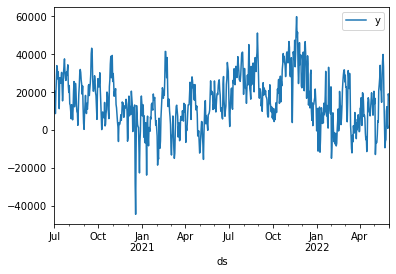

In [207]:
train_diff_pr.plot(y = 'y', x = 'ds')

In [208]:
# Fit the timeseries to Model_'energy source'
Model_diff.fit(train_diff_pr)

10:36:53 - cmdstanpy - INFO - Chain [1] start processing
10:36:54 - cmdstanpy - INFO - Chain [1] done processing


In [209]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_diff = Model_diff.make_future_dataframe(periods = 56, freq = 'D')

In [210]:
#Predict the future dates and values
results_diff = Model_diff.predict(df = future_diff)

results_diff.tail()

ds        trend    yhat_lower    yhat_upper  trend_lower  \
753 2022-07-24  4594.407503 -21091.403876  27179.613625  3536.662946   
754 2022-07-25  4529.419622 -19207.931329  29460.193662  3440.141591   
755 2022-07-26  4464.431742 -20573.805629  28661.485330  3344.813713   
756 2022-07-27  4399.443861 -20226.122338  28033.663952  3254.714593   
757 2022-07-28  4334.455981 -20660.830782  29381.348668  3164.618442   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
753  5846.156677     -573.955470           -573.955470           -573.955470   
754  5805.567145      630.872983            630.872983            630.872983   
755  5787.393535        5.894006              5.894006              5.894006   
756  5785.212009      -62.048293            -62.048293            -62.048293   
757  5771.098205      403.041615            403.041615            403.041615   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
753 -573.955470   -573.955470   -573.955470                   0.0   
754  630.872983    630.872983    630.872983                   0.0   
755    5.894006      5.894006      5.894006                   0.0   
756  -62.048293    -62.048293    -62.048293                   0.0   
757  403.041615    403.041615    403.041615                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
753                         0.0                         0.0  4020.452033  
754                         0.0                         0.0  5160.292606  
755                         0.0                         0.0  4470.325748  
756                         0.0                         0.0  4337.395568  
757                         0.0                         0.0  4737.497596

In [211]:
results_diff[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2020-07-01  19976.404459  -3340.766449  43441.172222
1   2020-07-02  20390.486958  -5305.968667  44577.107852
2   2020-07-03  20021.484521  -3954.900748  45204.795819
3   2020-07-04  19396.579099  -3889.131623  42547.886600
4   2020-07-05  19260.467648  -3817.168254  44964.932745
..         ...           ...           ...           ...
753 2022-07-24   4020.452033 -21091.403876  27179.613625
754 2022-07-25   5160.292606 -19207.931329  29460.193662
755 2022-07-26   4470.325748 -20573.805629  28661.485330
756 2022-07-27   4337.395568 -20226.122338  28033.663952
757 2022-07-28   4737.497596 -20660.830782  29381.348668

[758 rows x 4 columns]

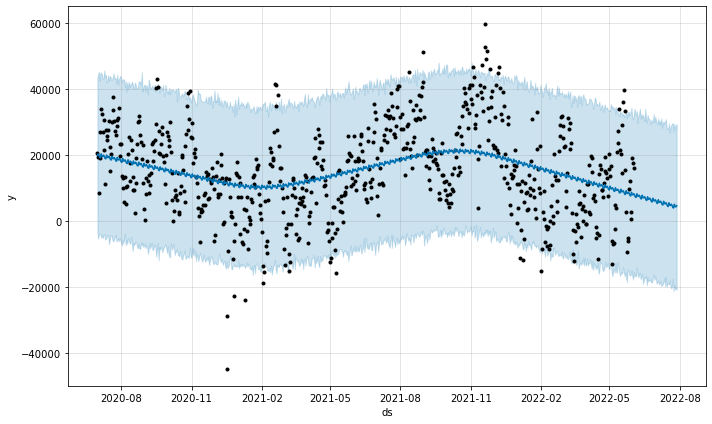

In [212]:
# plot the predictions
Model_diff.plot(results_diff);

Prophet plotted the observered values (black dots) from the time series, the forecasted value (blue line), and the uncertainty interval (blue shade).

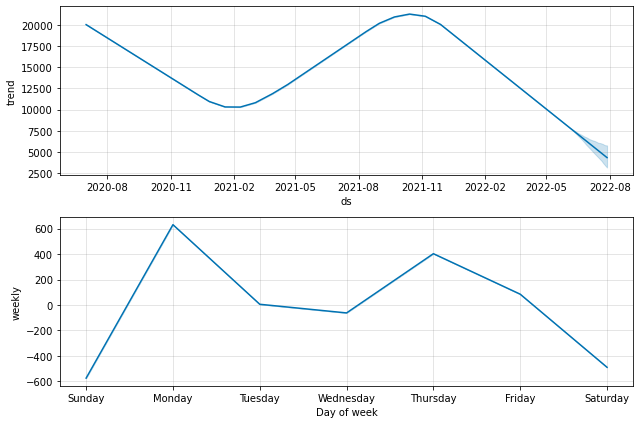

In [213]:
# Plot model components
Model_diff.plot_components(results_diff);

### Conclusion:
- PMDArima
    - The test predictions and the actually test data was off. The test data was higher than that of the predictions.
- FBProphet
    - The observed values follow a trend but is not comparable to that of  the forecasted values with some falling outside the uncertainty interval.

## Future Dates Difference

In [214]:
future_index = pd.date_range("2022-07-29", periods=56, freq='D')

In [215]:
# Prophet default uncertainty interval is 80%, below we adjusting it to 95%.
Model_future = Prophet(interval_width = 0.95)

In [216]:
df_comb_diff = df_comb_diff.reset_index()

df_comb_diff = df_comb_diff.rename(columns = {'period': 'ds', 0: 'y'})

df_comb_diff

ds      y
0   2020-07-01  20578
1   2020-07-02  19416
2   2020-07-03   8623
3   2020-07-04  19117
4   2020-07-05  27147
..         ...    ...
753 2022-07-24   2294
754 2022-07-25  16472
755 2022-07-26   8944
756 2022-07-27   5295
757 2022-07-28    522

[758 rows x 2 columns]

In [217]:
# Fit the timeseries to Model_'energy source'
Model_future.fit(df_comb_diff)

10:36:58 - cmdstanpy - INFO - Chain [1] start processing
10:37:00 - cmdstanpy - INFO - Chain [1] done processing


In [218]:
# Use a weekly freqency and periods of 8 weeks or two months or 56 day
future_future = Model_future.make_future_dataframe(periods = 56, freq = 'D')

In [219]:
#Predict the future dates and values
results_future = Model_future.predict(df = future_future)

results_future

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0   2020-07-01    532.740469 -85391.657534   98063.332108    532.740469   
1   2020-07-02    584.215550 -79580.162066  103448.679619    584.215550   
2   2020-07-03    635.690631 -72316.684326  118462.962569    635.690631   
3   2020-07-04    687.165711 -77593.843296  113037.932857    687.165711   
4   2020-07-05    738.640792 -67458.904959  120528.940835    738.640792   
..         ...           ...           ...            ...           ...   
809 2022-09-18  57659.132396 -30168.427121  157636.001825  56815.316011   
810 2022-09-19  57823.515791 -29480.020335  152981.217680  56953.683639   
811 2022-09-20  57987.899186 -33638.901639  152497.628498  57092.093506   
812 2022-09-21  58152.282581 -35221.465917  151557.674339  57232.206204   
813 2022-09-22  58316.665976 -27581.300587  158570.066531  57368.227442   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      532.740469     -644.161595           -644.161595           -644.161595   
1      584.215550     9607.324504           9607.324504           9607.324504   
2      635.690631    17082.546294          17082.546294          17082.546294   
3      687.165711    21455.262213          21455.262213          21455.262213   
4      738.640792    26608.228412          26608.228412          26608.228412   
..            ...             ...                   ...                   ...   
809  58618.037848     6456.457994           6456.457994           6456.457994   
810  58822.336917     3320.943381           3320.943381           3320.943381   
811  58995.392647     1644.259085           1644.259085           1644.259085   
812  59176.015838     2320.898321           2320.898321           2320.898321   
813  59363.407472     7908.771945           7908.771945           7908.771945   

          weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0   -3682.399325  -3682.399325  -3682.399325   3038.237730   3038.237730   
1    1349.237407   1349.237407   1349.237407   8258.087097   8258.087097   
2    3428.729896   3428.729896   3428.729896  13653.816398  13653.816398   
3    2318.404866   2318.404866   2318.404866  19136.857346  19136.857346   
4    1993.170809   1993.170809   1993.170809  24615.057603  24615.057603   
..           ...           ...           ...           ...           ...   
809  1993.170809   1993.170809   1993.170809   4463.287185   4463.287185   
810 -1603.434368  -1603.434368  -1603.434368   4924.377749   4924.377749   
811 -3803.709286  -3803.709286  -3803.709286   5447.968371   5447.968371   
812 -3682.399325  -3682.399325  -3682.399325   6003.297646   6003.297646   
813  1349.237407   1349.237407   1349.237407   6559.534537   6559.534537   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0     3038.237730                   0.0                         0.0   
1     8258.087097                   0.0                         0.0   
2    13653.816398                   0.0                         0.0   
3    19136.857346                   0.0                         0.0   
4    24615.057603                   0.0                         0.0   
..            ...                   ...                         ...   
809   4463.287185                   0.0                         0.0   
810   4924.377749                   0.0                         0.0   
811   5447.968371                   0.0                         0.0   
812   6003.297646                   0.0                         0.0   
813   6559.534537                   0.0                         0.0   

     multiplicative_terms_upper          yhat  
0                           0.0   -111.421126  
1                           0.0  10191.540054  
2                           0.0  17718.236925  
3                           0.0  22142.427924  
4                           0.0  27346.869204  
..                          ...           ...  
809                         0.0  641

In [220]:
results_future['ds'].max()

Timestamp('2022-09-22 00:00:00')

In [221]:
df_comb_diff

ds      y
0   2020-07-01  20578
1   2020-07-02  19416
2   2020-07-03   8623
3   2020-07-04  19117
4   2020-07-05  27147
..         ...    ...
753 2022-07-24   2294
754 2022-07-25  16472
755 2022-07-26   8944
756 2022-07-27   5295
757 2022-07-28    522

[758 rows x 2 columns]